## Assignment 1
### Exersice 1


In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# import library
#install.packages('tidyverse', dependencies=TRUE)
#install.packages('dplyr')
library(rvest)
library(dplyr)
library(ggplot2)
library(reshape2)
library(readr)
#library(gridExtra)
#library(cowplot)
library(lubridate)


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




##### 1.1

In [3]:
american_airline_empl <- read.delim2("~/proj/american_airline_empl.txt")
delta_airline_empl <- read.delim2("~/proj/delta_airline_empl.txt")
federal_express_empl <- read.delim2("~/proj/federal_express_empl.txt")
united_airline_empl <- read.delim2("~/proj/united_airline_empl.txt")

##### 1.2

In [4]:
data <- american_airline_empl %>% inner_join(delta_airline_empl, by=c("Month"= "Month", "Year"="Year")) %>% 
    inner_join(federal_express_empl, by=c("Month"= "Month", "Year"="Year")) %>% 
    inner_join(united_airline_empl, by=c("Month"= "Month", "Year"="Year"))

#rename the column 
colnames(data) <- c("Month", "Year", "Full.time.amr", "Part.time.amr","Grand.Total.amr", "Full.time.dlt", "Part.time.dlt","Grand.Total.dlt",
 "Full.time.fdr", "Part.time.fdr","Grand.Total.fdr", "Full.time.uni", "Part.time.uni","Grand.Total.uni")
 data


Month,Year,Full.time.amr,Part.time.amr,Grand.Total.amr,Full.time.dlt,Part.time.dlt,Grand.Total.dlt,Full.time.fdr,Part.time.fdr,Grand.Total.fdr,Full.time.uni,Part.time.uni,Grand.Total.uni
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1990,68.137,9.039,77.176,56.340,4.226,60.566,61.305,23.580,84.885,65.664,5.457,71.121
2,1990,68.725,9.273,77.998,56.413,4.184,60.597,61.485,23.520,85.005,65.839,5.446,71.285
3,1990,69.509,9.376,78.885,56.700,4.117,60.817,62.244,22.774,85.018,66.070,5.445,71.515
4,1990,69.713,9.326,79.039,56.630,4.112,60.742,63.511,22.917,86.428,66.779,5.518,72.297
5,1990,70.376,9.309,79.685,56.932,4.156,61.088,63.044,23.382,86.426,67.217,5.675,72.892
6,1990,71.258,9.369,80.627,57.478,4.197,61.675,64.704,23.246,87.950,67.924,5.978,73.902
7,1990,72.018,9.651,81.669,58.200,4.377,62.577,65.153,23.659,88.812,68.331,5.966,74.297
8,1990,72.513,9.694,82.207,58.220,4.433,62.653,65.515,23.514,89.029,68.431,5.992,74.423
9,1990,72.776,9.788,82.564,57.844,4.433,62.277,66.899,23.552,90.451,68.472,5.714,74.186


##### 1.3

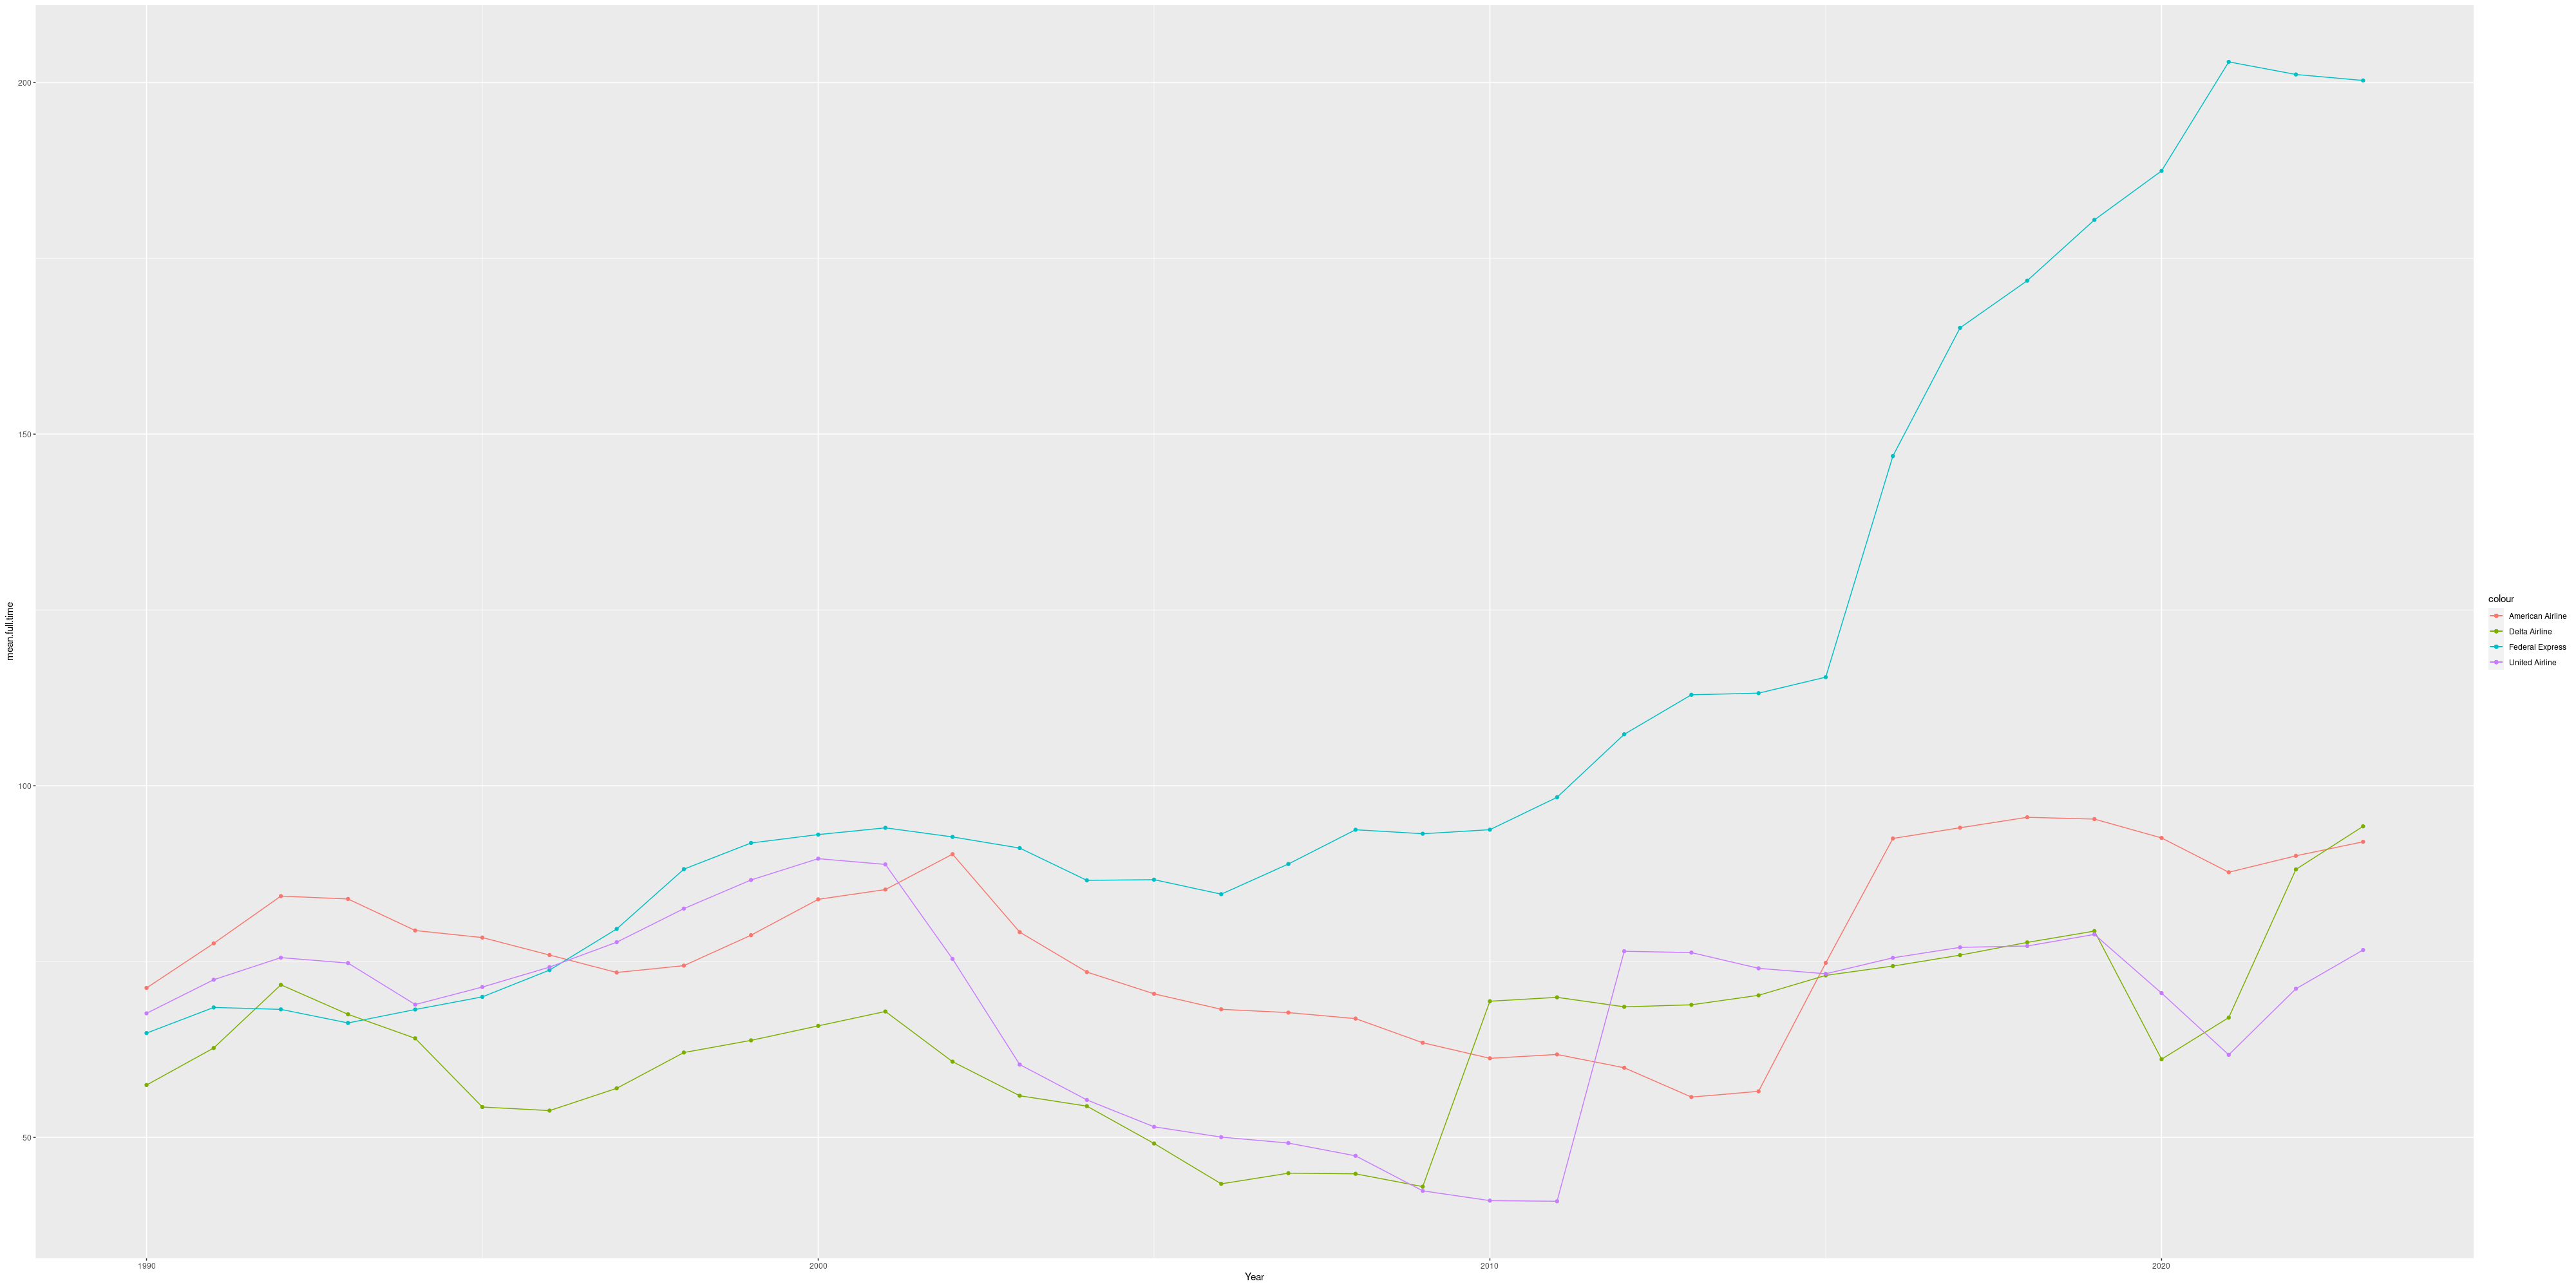

In [11]:
#calculate mean of each year - then rename the 
famerica <- american_airline_empl %>% group_by(Year) %>% summarise(mean(Full.time))
colnames(famerica) <- c("Year", "mean.full.time")
fdelta <- delta_airline_empl %>% group_by(Year) %>% summarise(mean(Full.time))
colnames(fdelta) <- c("Year", "mean.full.time")
ffederal <- federal_express_empl %>% group_by(Year) %>% summarise(mean(Full.time))
colnames(ffederal) <- c("Year", "mean.full.time")
funited <- united_airline_empl %>% group_by(Year) %>% summarise(mean(Full.time))
colnames(funited) <- c("Year", "mean.full.time")

#plot the fulltime_employees for each company 
ggplot() +
    geom_point(data=famerica, aes(x=Year, y=mean.full.time, colour='American Airline'))+geom_line(data=famerica, aes(x=Year, y=mean.full.time, colour='American Airline'))+ 
    geom_point(data=fdelta, aes(x=Year, y=mean.full.time, colour='Delta Airline'))+geom_line(data=fdelta, aes(x=Year, y=mean.full.time, colour='Delta Airline'))+ 
    geom_point(data=ffederal, aes(x=Year, y=mean.full.time, colour='Federal Express'))+geom_line(data=ffederal, aes(x=Year, y=mean.full.time, colour='Federal Express'))+ 
    geom_point(data=funited, aes(x=Year, y=mean.full.time, colour='United Airline'))+geom_line(data=funited, aes(x=Year, y=mean.full.time, colour='United Airline'))

options(repr.plot.width = 40, repr.plot.height = 2, repr.plot.res = 100) 

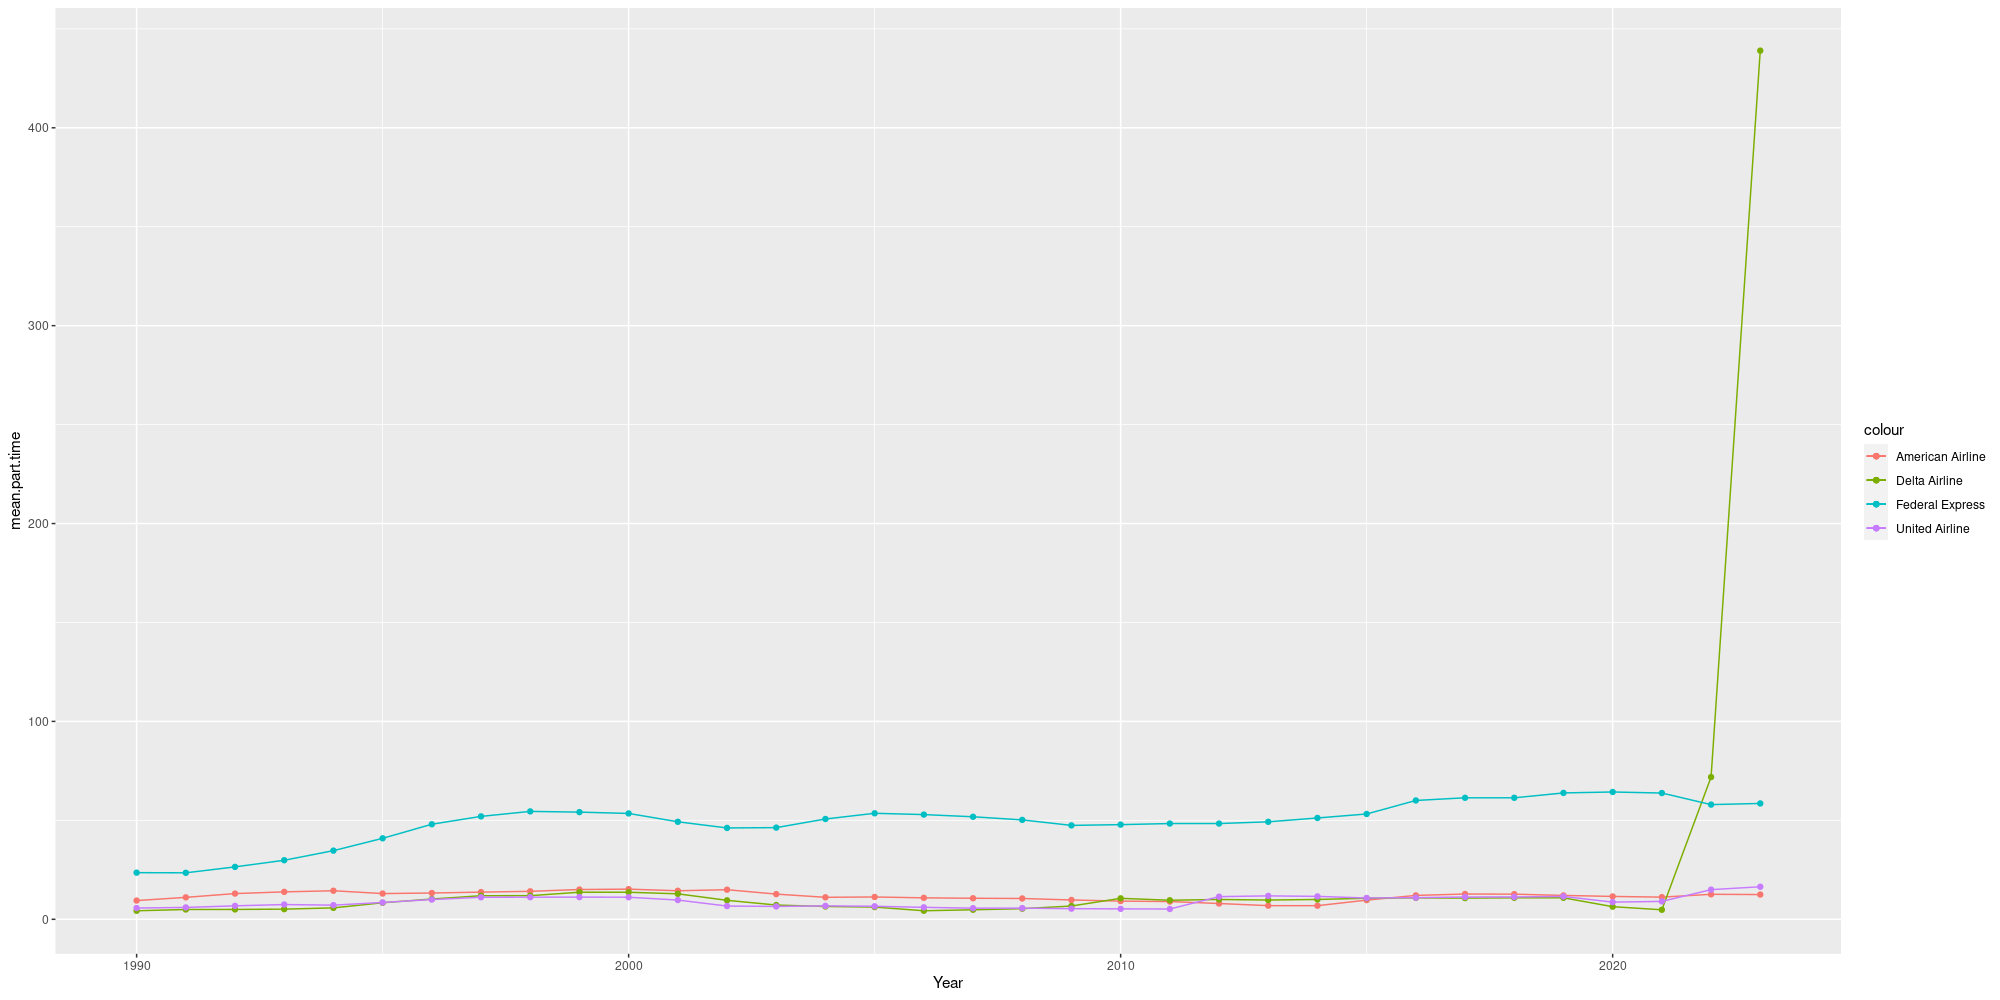

In [33]:
#calculate mean of each year 
pamerica <- american_airline_empl %>% group_by(Year) %>% summarise(mean.part.time=mean(Part.time))
pdelta <- delta_airline_empl %>% group_by(Year) %>% summarise(mean.part.time=mean(Part.time))
pfederal <- federal_express_empl %>% group_by(Year) %>% summarise(mean.part.time=mean(Part.time))
punited <- united_airline_empl %>% group_by(Year) %>% summarise(mean.part.time=mean(Part.time))


#plot the fulltime_employees for each company 
ggplot() +
    geom_point(data=pamerica, aes(x=Year, y=mean.part.time, colour='American Airline'))+geom_line(data=pamerica, aes(x=Year, y=mean.part.time, colour='American Airline'))+ 
    geom_point(data=pdelta, aes(x=Year, y=mean.part.time, colour='Delta Airline'))+geom_line(data=pdelta, aes(x=Year, y=mean.part.time, colour='Delta Airline'))+ 
    geom_point(data=pfederal, aes(x=Year, y=mean.part.time, colour='Federal Express'))+geom_line(data=pfederal, aes(x=Year, y=mean.part.time, colour='Federal Express'))+ 
    geom_point(data=punited, aes(x=Year, y=mean.part.time, colour='United Airline'))+geom_line(data=punited, aes(x=Year, y=mean.part.time, colour='United Airline'))

options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 100) 

##### 1.4

In [12]:
print('The maximum number of employees for American Airline is:', )
print(american_airline_empl[(which.max(american_airline_empl$Grand.Total)),1:2])
print('The minimum is:')
print(american_airline_empl[(which.min(american_airline_empl$Grand.Total)),1:2])


print('The maximum number of employees for Delta Airline is:', )
print(delta_airline_empl[(which.max(delta_airline_empl$Grand.Total)),1:2])
print('The minimum is:')
print(delta_airline_empl[(which.min(delta_airline_empl$Grand.Total)),1:2])


print('The maximum number of employees for Federal Express is:', )
print(federal_express_empl [(which.max(federal_express_empl$Grand.Total)),1:2])
print('The minimum is:')
print(federal_express_empl[(which.min(federal_express_empl$Grand.Total)),1:2])


print('The maximum number of employees for United Airline is:', )
print(united_airline_empl[(which.max(united_airline_empl$Grand.Total)),1:2])
print('The minimum is:')
print(united_airline_empl[(which.min(united_airline_empl$Grand.Total)),1:2])

[1] "The maximum number of employees for American Airline is:"
    Month Year
342     6 2018
[1] "The minimum is:"
    Month Year
285     9 2013
[1] "The maximum number of employees for Delta Airline is:"
    Month Year
397     1 2023
[1] "The minimum is:"
    Month Year
203    11 2006
[1] "The maximum number of employees for Federal Express is:"
    Month Year
375     3 2021
[1] "The minimum is:"
  Month Year
1     1 1990
[1] "The maximum number of employees for United Airline is:"
    Month Year
135     3 2001
[1] "The minimum is:"
    Month Year
258     6 2011


##### 1.5

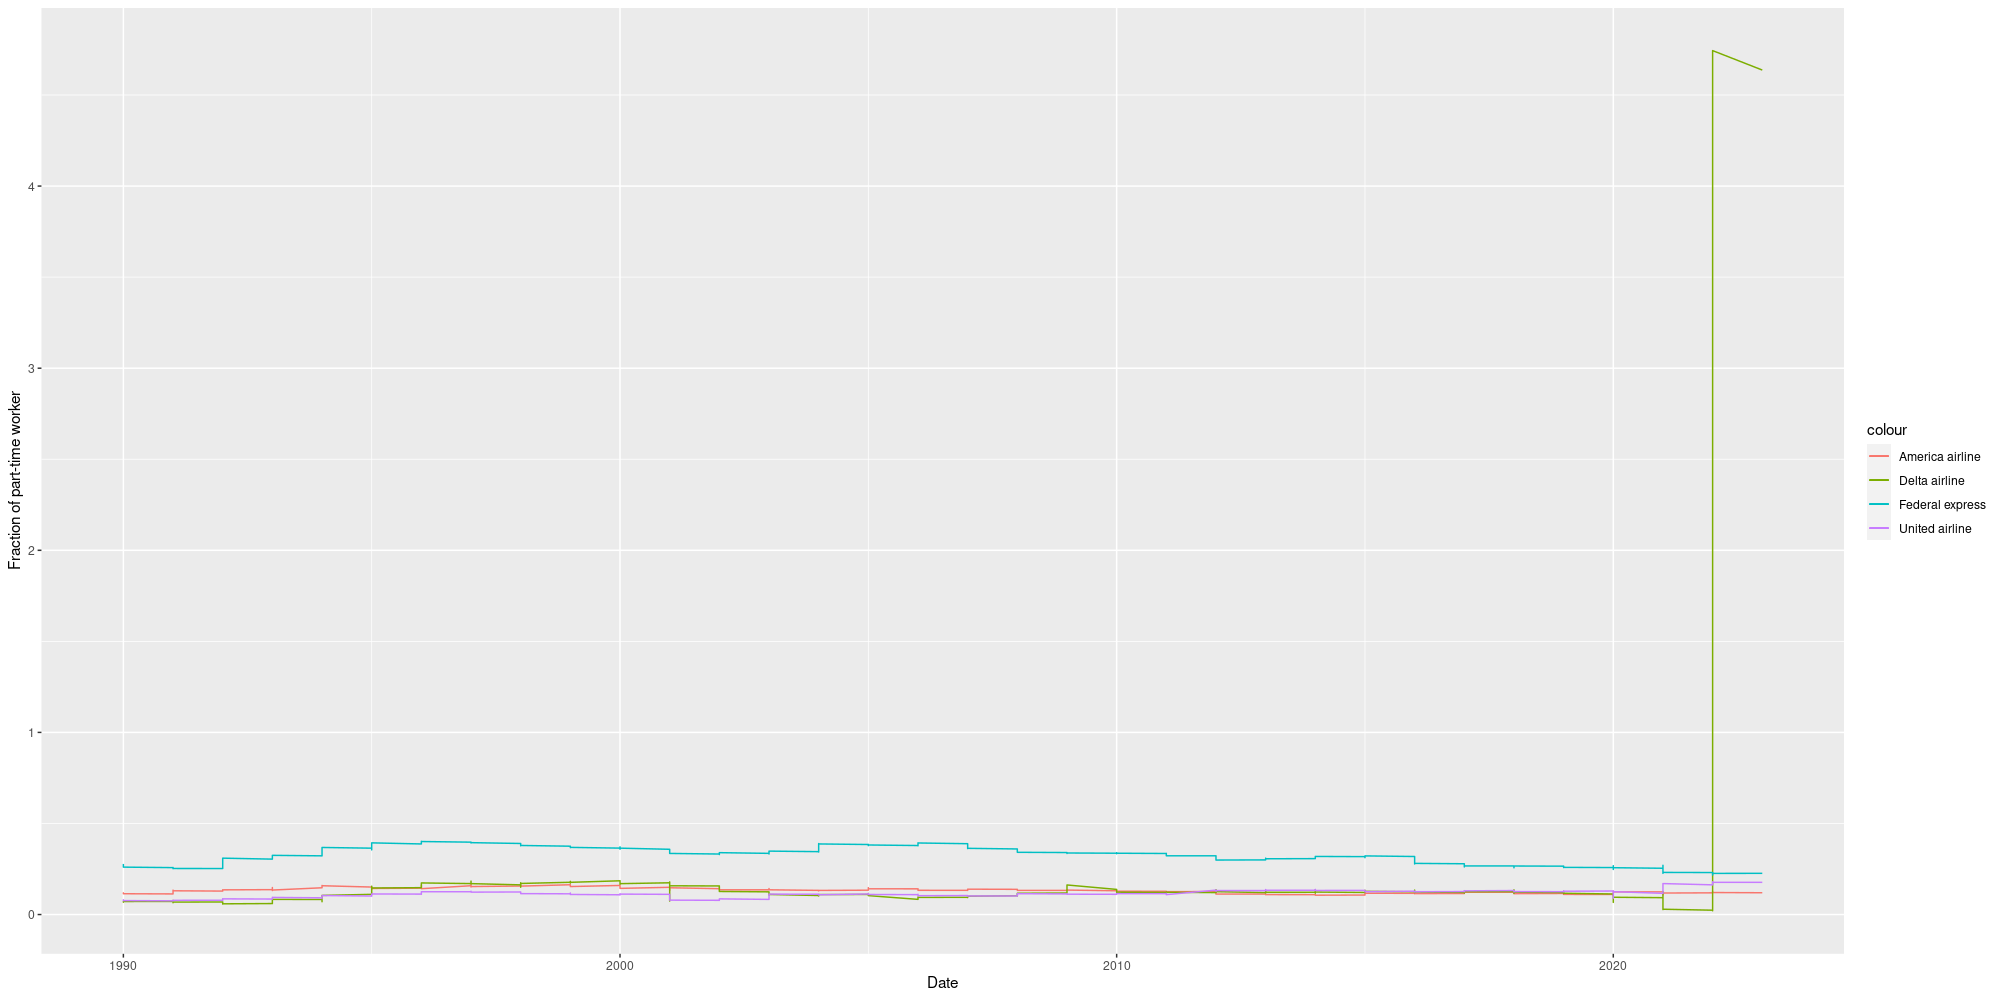

In [14]:
data |>
    ggplot() +
    geom_line(aes(x=Year, y=Part.time.amr/Grand.Total.amr, colour='America airline')) +
    geom_line(aes(x=Year, y=Part.time.dlt/Grand.Total.dlt, colour='Delta airline')) +
    geom_line(aes(x=Year, y=Part.time.fdr/Grand.Total.fdr, colour='Federal express')) +
    geom_line(aes(x=Year, y=Part.time.uni/Grand.Total.uni, colour='United airline')) +
    labs(x='Date', y='Fraction of part-time worker') 

options(repr.plot.width = 20, repr.plot.height =1 , repr.plot.res = 100) 
     


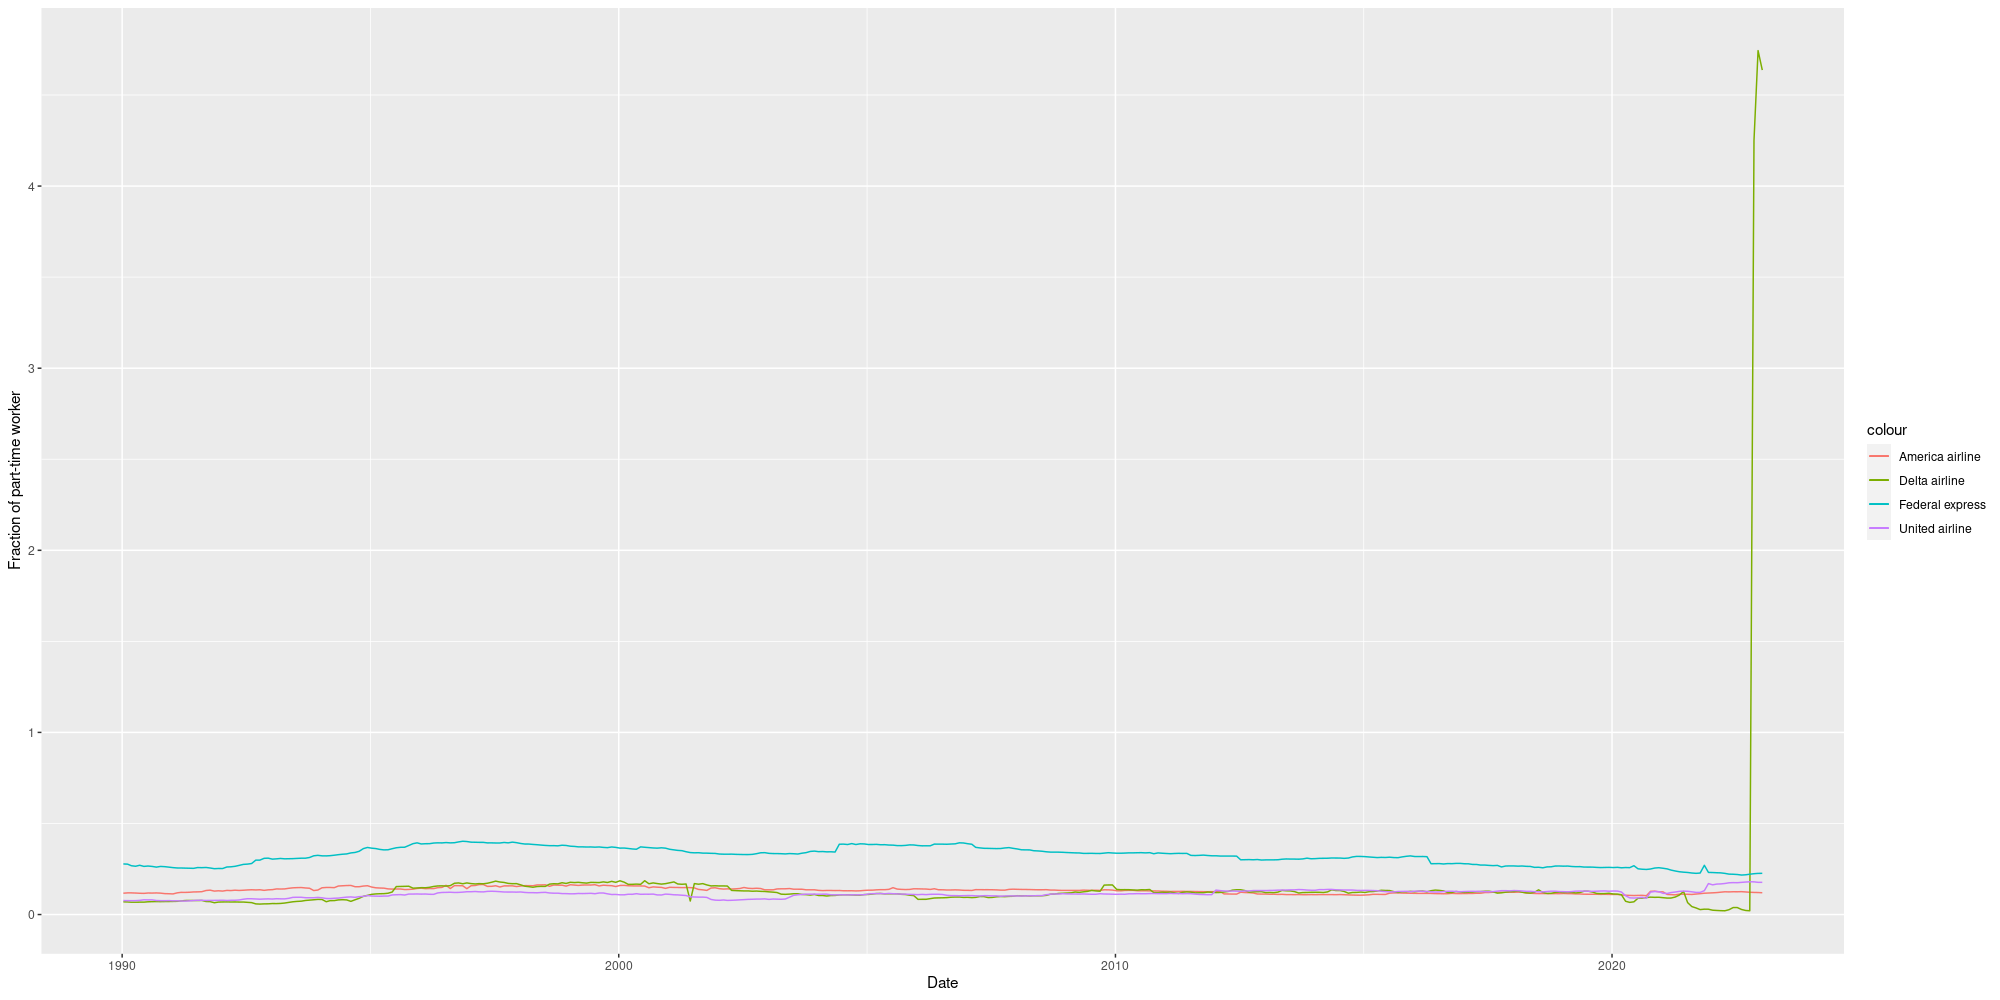

In [18]:
#This is another way but the outputs are the same
data$flight_date <- paste(data$Year , data$Month, sep = "-") |> paste('-10', sep = "") |> as.Date()

 data|> ggplot() +
    geom_line(aes(x=flight_date, y=Part.time.amr/Grand.Total.amr, colour='America airline')) +
    geom_line(aes(x=flight_date, y=Part.time.dlt/Grand.Total.dlt, colour='Delta airline')) +
    geom_line(aes(x=flight_date, y=Part.time.fdr/Grand.Total.fdr, colour='Federal express')) +
    geom_line(aes(x=flight_date, y=Part.time.uni/Grand.Total.uni, colour='United airline')) +
    labs(x='Date', y='Fraction of part-time worker') 

 options(repr.plot.width = 2, repr.plot.height =10 , repr.plot.res = 100) 

##### 1.6

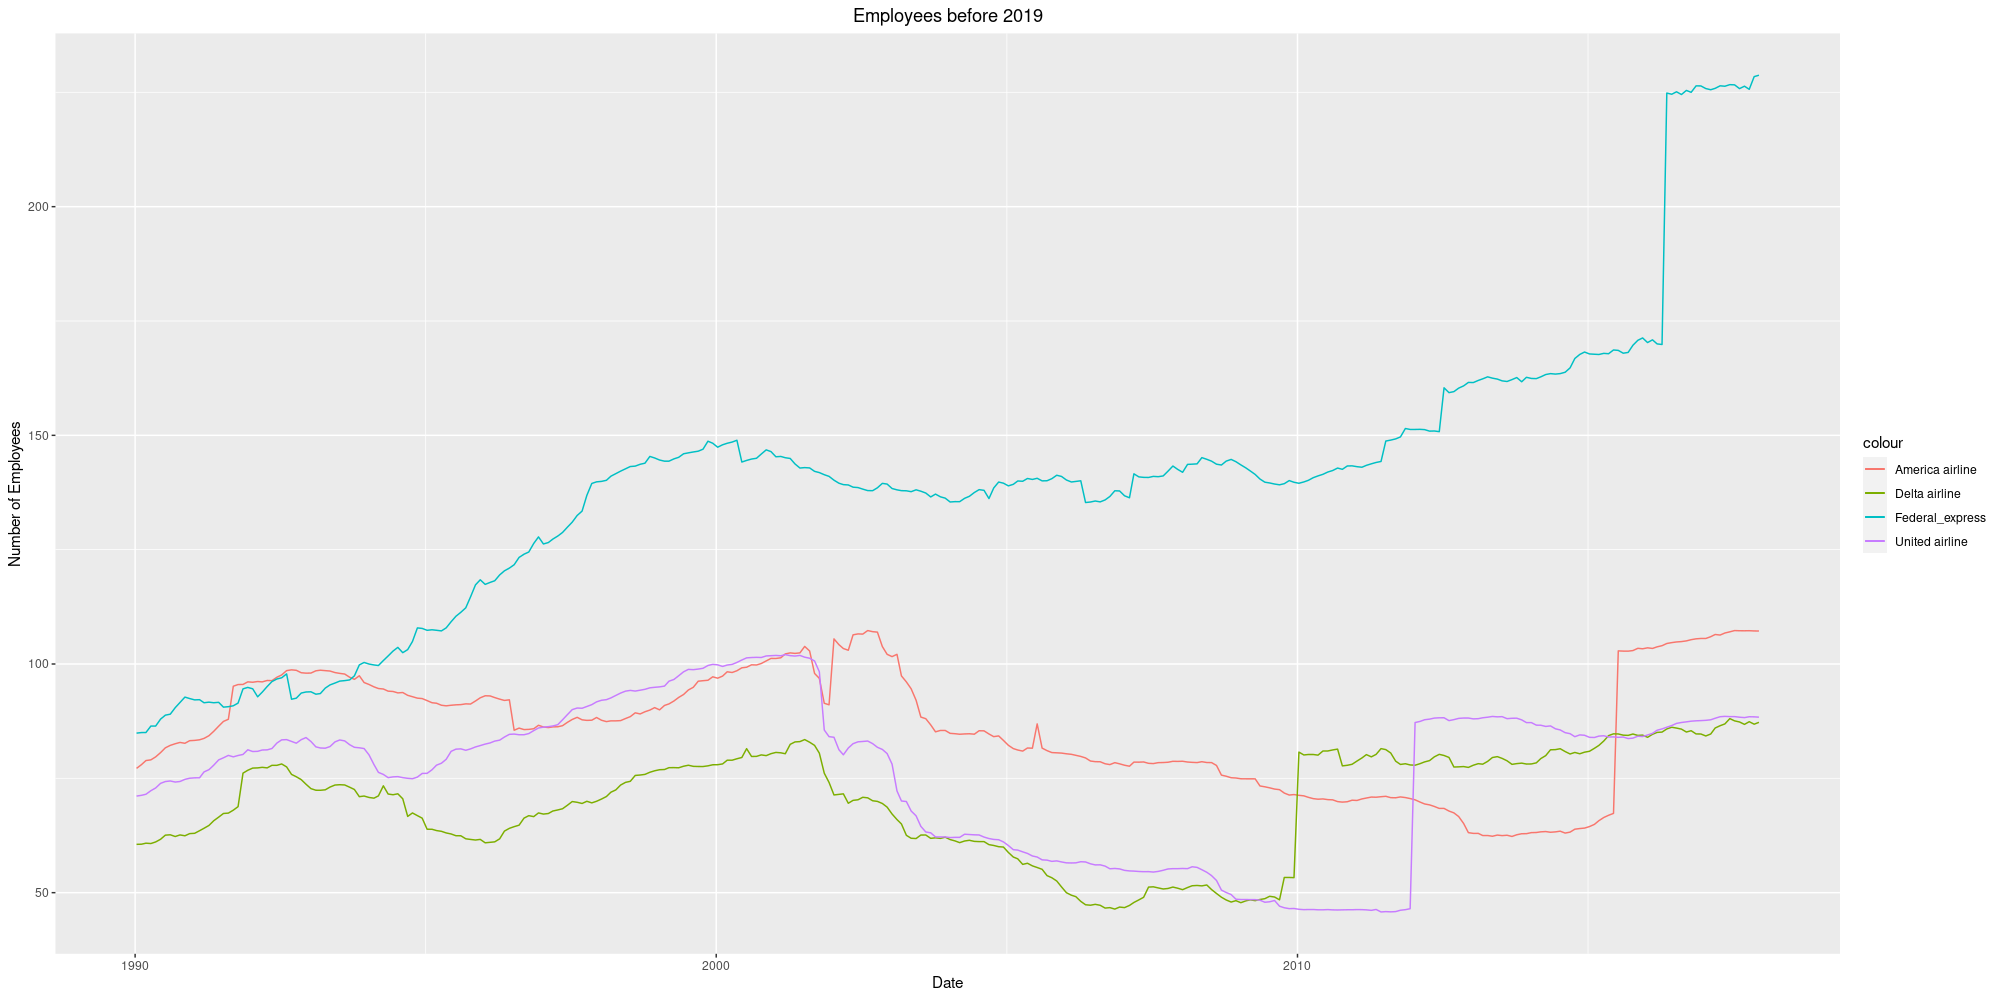

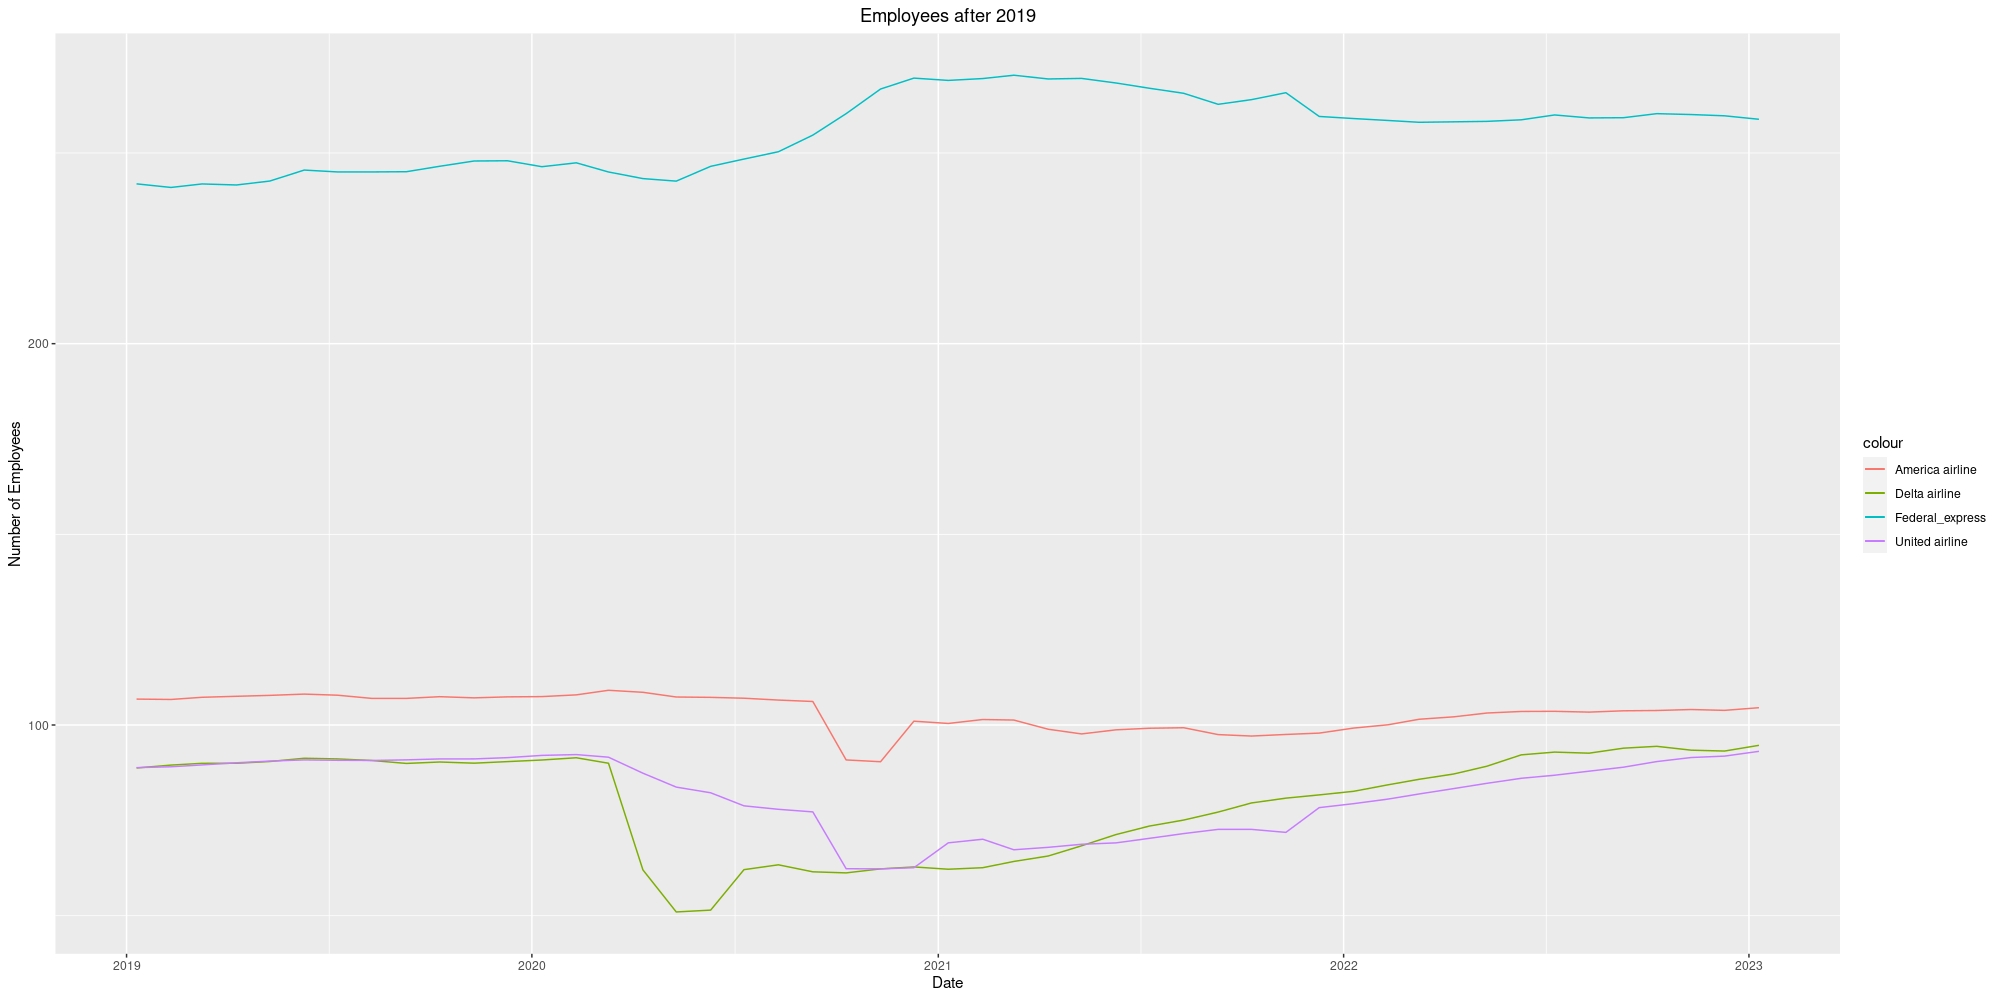

In [22]:
b_pand <-data |>
    filter(Year < 2018) |>
    ggplot()+
    geom_line(aes(x=flight_date, y=Grand.Total.amr, colour='America airline')) +
    geom_line(aes(x=flight_date, y=Grand.Total.dlt, colour='Delta airline')) +
    geom_line(aes(x=flight_date, y=Grand.Total.fdr, colour='Federal_express'))+
    geom_line(aes(x=flight_date, y=Grand.Total.uni, colour='United airline'))+
    labs(x='Date', y='Number of Employees')+
    ggtitle("Employees before 2019")+ theme(plot.title = element_text(hjust = 0.5))


pand <- data|>
    filter(Year > 2018) |>
    ggplot() +
    geom_line(aes(x=flight_date, y=Grand.Total.amr, colour='America airline')) +
    geom_line(aes(x=flight_date, y=Grand.Total.dlt, colour='Delta airline')) +
    geom_line(aes(x=flight_date, y=Grand.Total.fdr, colour='Federal_express'))+
    geom_line(aes(x=flight_date, y=Grand.Total.uni, colour='United airline'))+
    labs(x="Date", y='Number of Employees') + ggtitle("Employees after 2019")+ theme(plot.title = element_text(hjust = 0.5))

b_pand
pand
 options(repr.plot.width = 20, repr.plot.height =15 , repr.plot.res = 100) 

## Exersice 2

In [23]:
#install.packages('nycflights13')
library(nycflights13)

In [24]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


##### 2.1

In [25]:
flights$date <- make_date(year=flights$year, month=flights$month, day=flights$day)

In [26]:

num_f <- flights |> count(origin, date) 

EWR_airport <- num_f[num_f$origin == "EWR",]
LGA_airport <- num_f[num_f$origin == "LGA",]
JFK_airport <- num_f[num_f$origin == "JFK",]


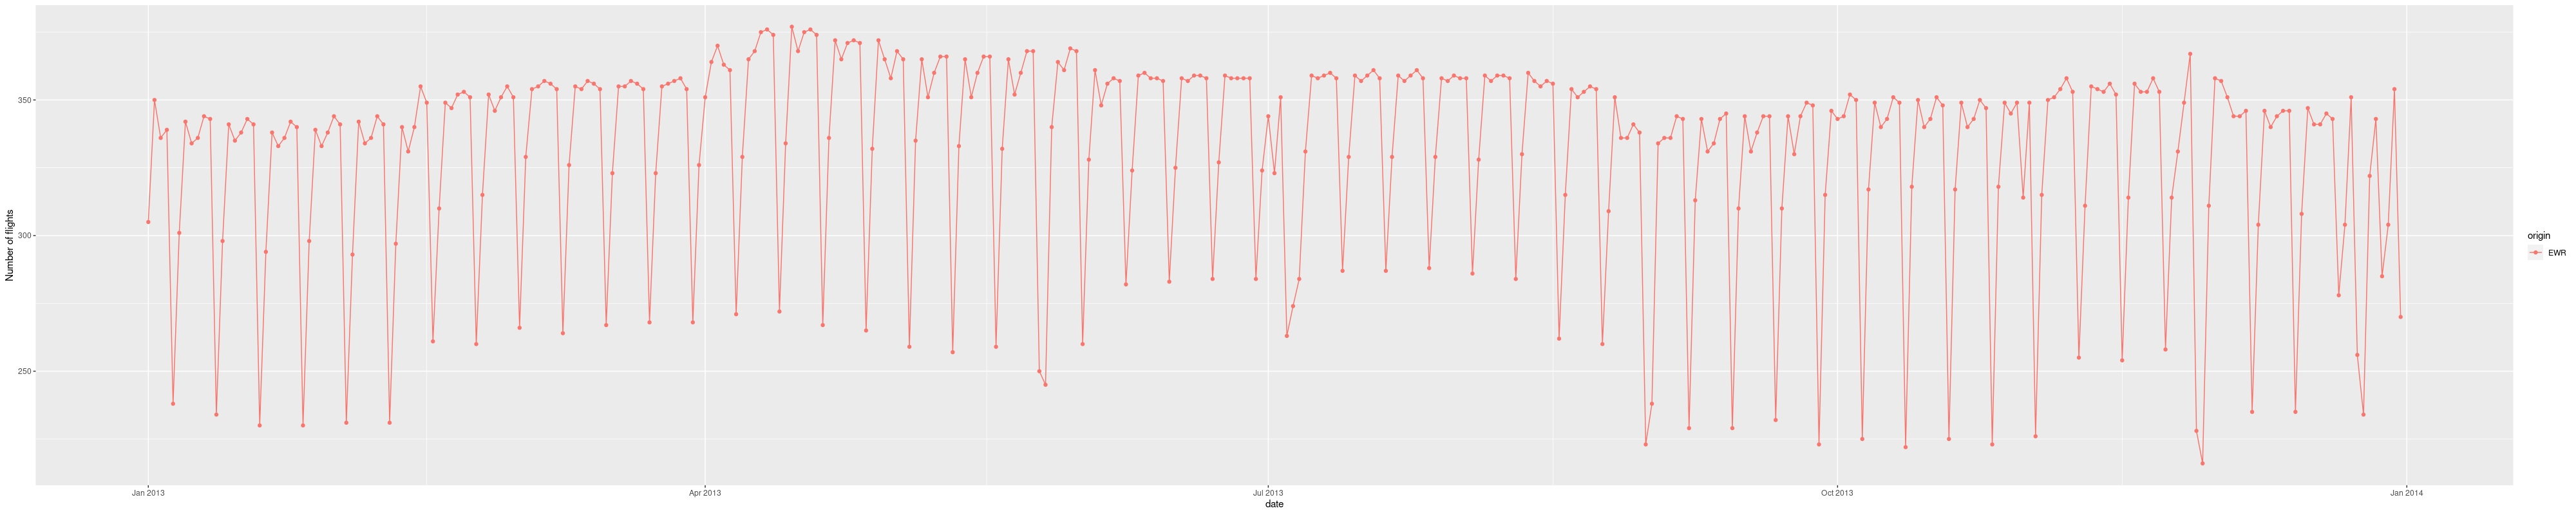

In [50]:
ggplot(EWR_airport, aes(x=date, y=n, colour=origin)) +
        geom_point() +
        geom_line() +
        labs(x='date', y='Number of flights')
 options(repr.plot.width = 50, repr.plot.height =8 , repr.plot.res = 100) 

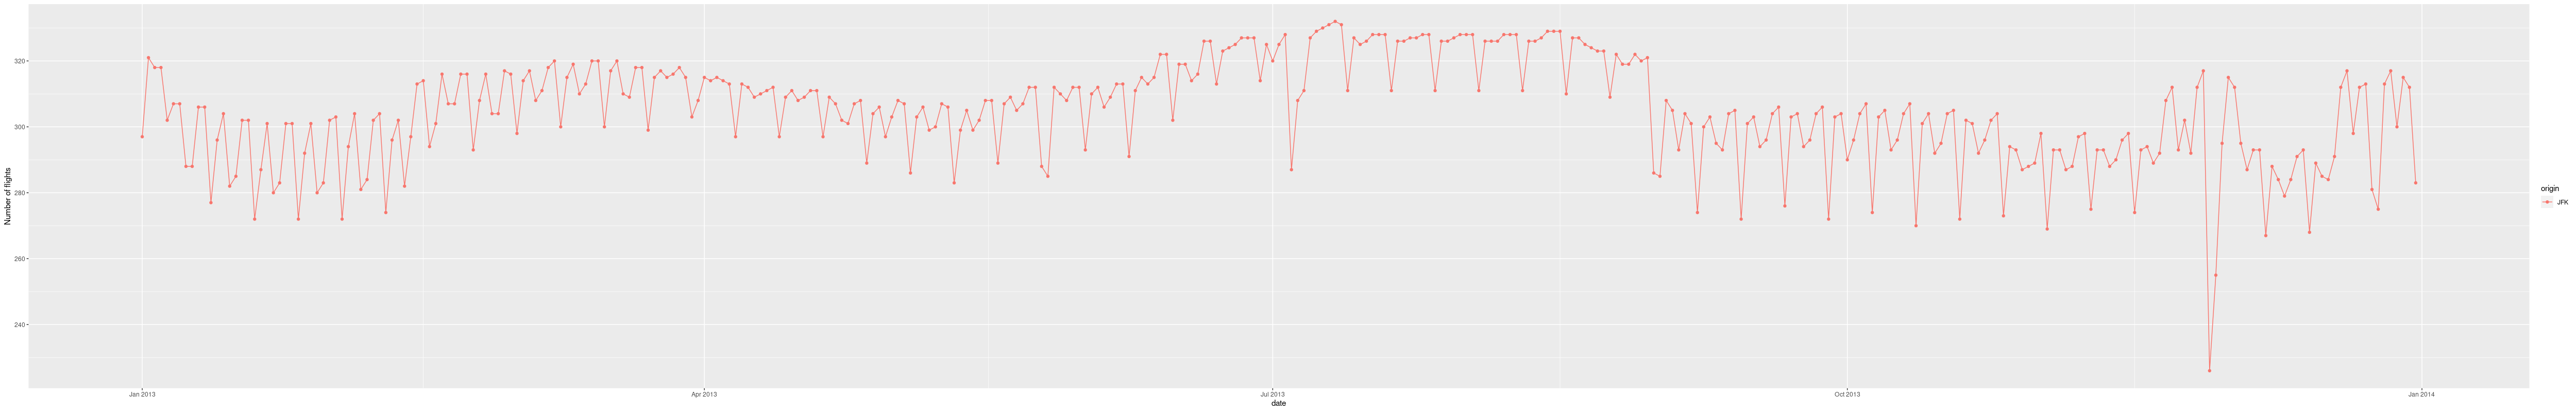

In [51]:
ggplot(JFK_airport, aes(x=date, y=n, colour=origin)) +
        geom_point() +
        geom_line() +
        labs(x='date', y='Number of flights')
 #options(repr.plot.width = 20, repr.plot.height =1 , repr.plot.res = 100) 

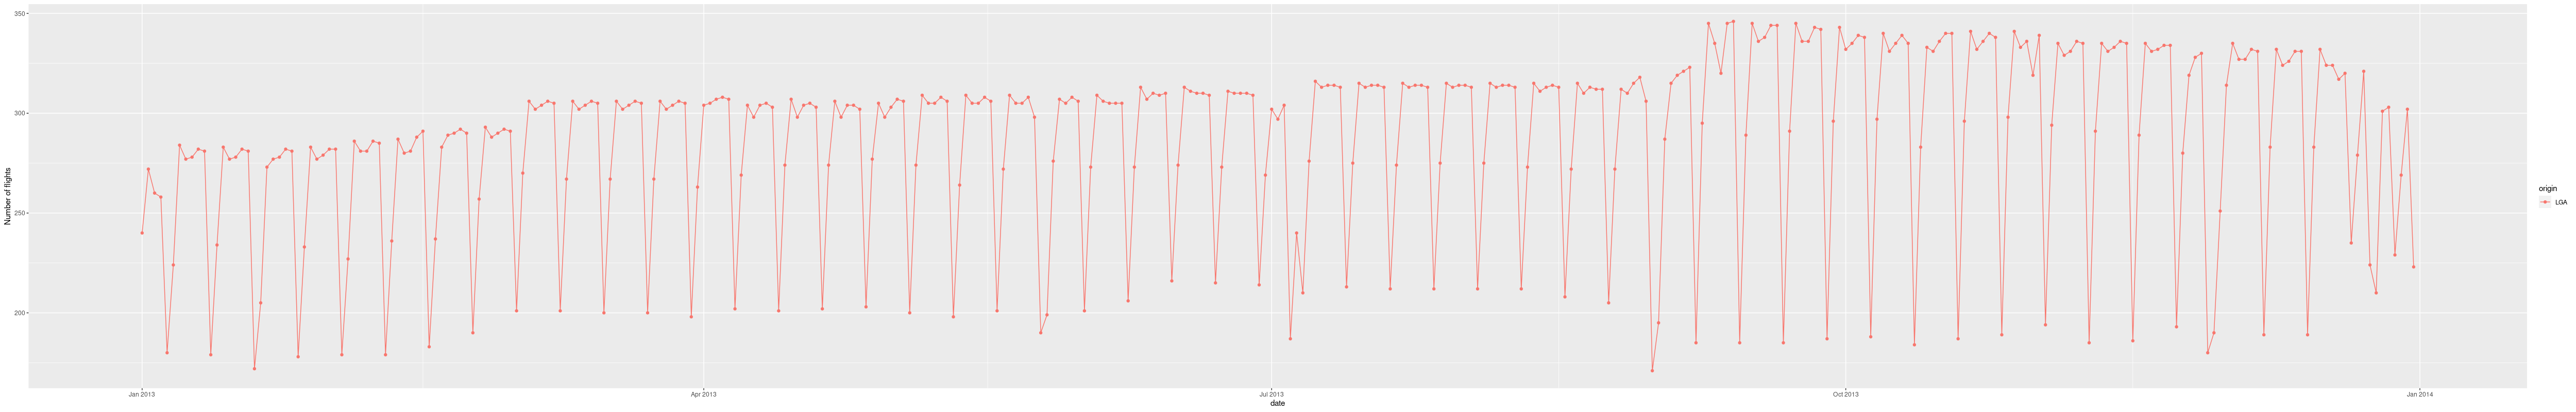

In [52]:
ggplot(LGA_airport, aes(x=date, y=n, colour=origin)) +
        geom_point() +
        geom_line() +
        labs(x='date', y='Number of flights') 



##### 2.2

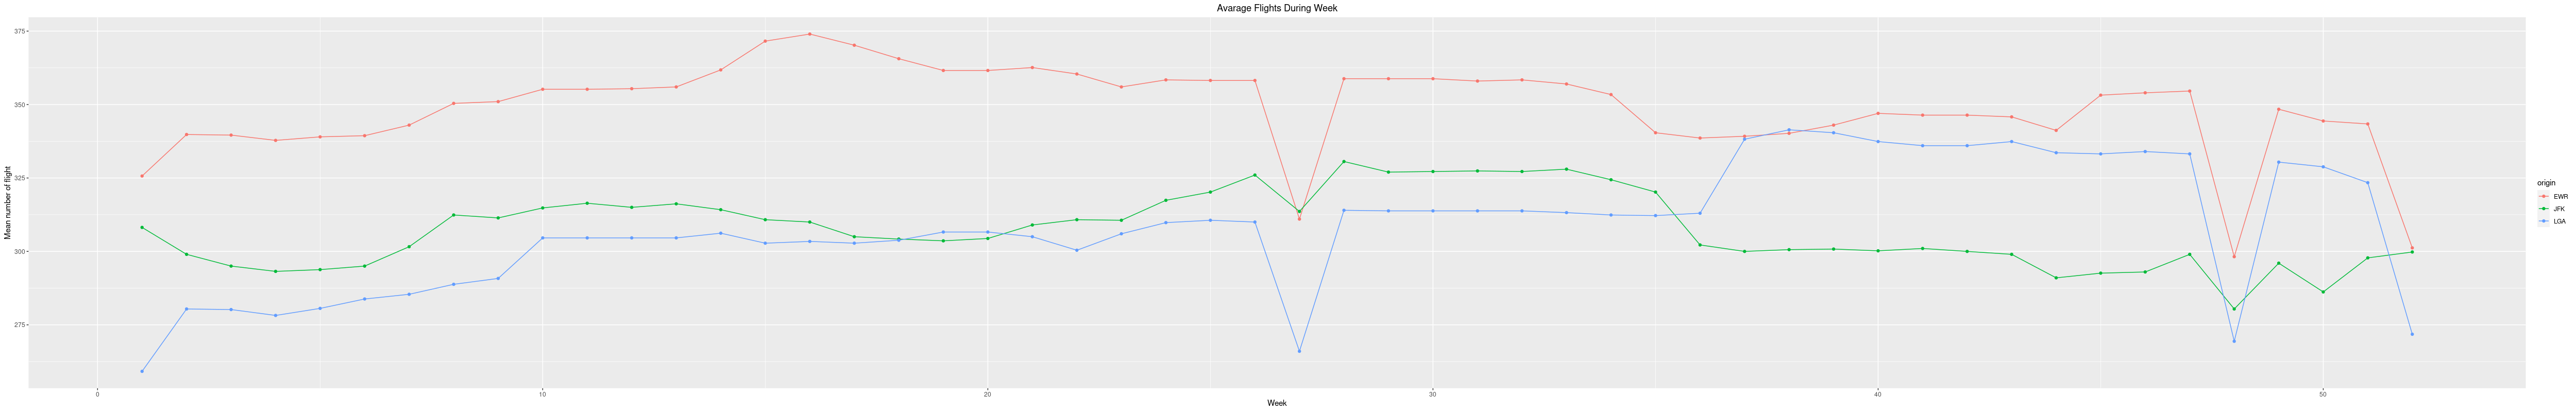

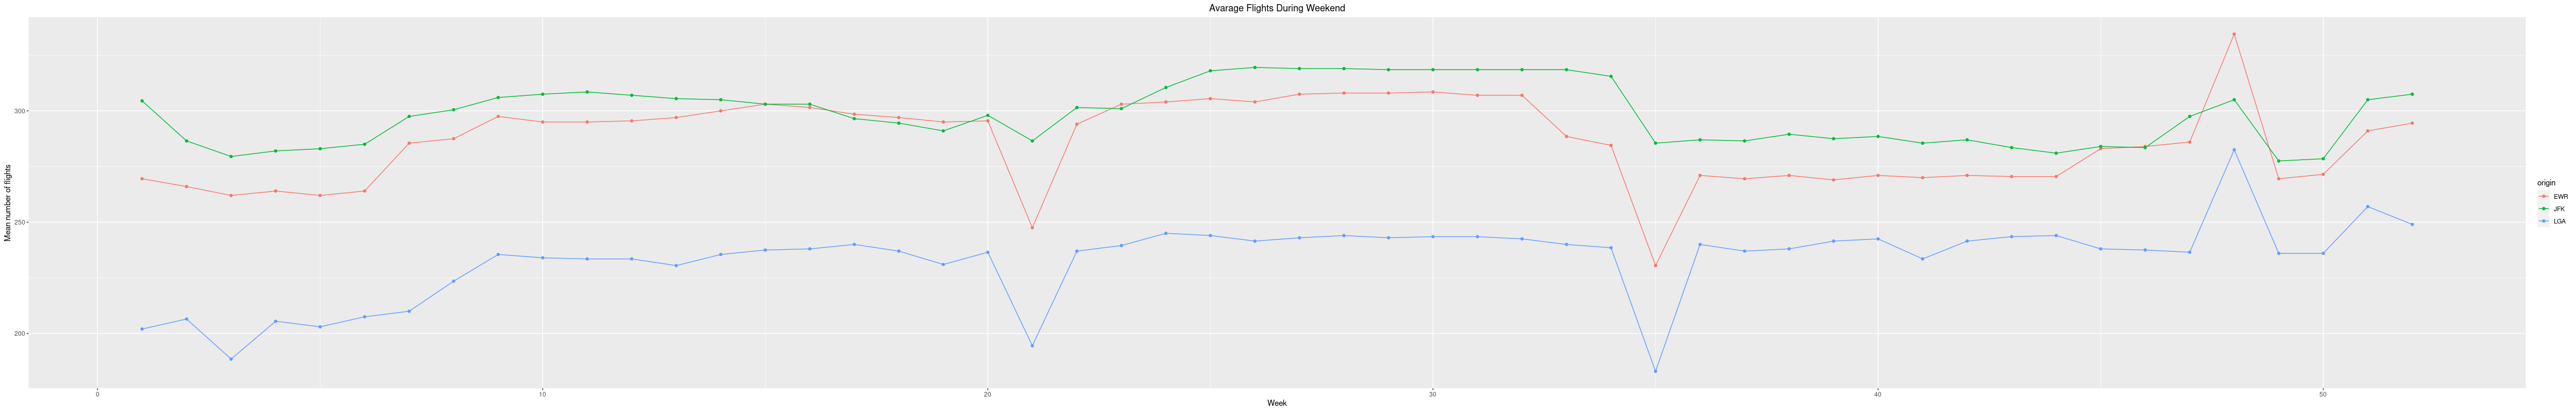

In [53]:
num_f$week_day <- wday(num_f$date, week_start=1)
num_f$week_number <- isoweek(num_f$date)

week_flights <- num_f |>
                filter(week_day < 6) |>
                group_by(week_number, origin) |>
                summarize(mean_flights = mean(n), .groups='drop') |>
                ggplot() +
                geom_line(aes(x=week_number, y=mean_flights, colour=origin)) +
                geom_point(aes(x=week_number, y=mean_flights, colour=origin)) +
                labs(x='Week', y='Mean number of flight') +
                ggtitle("Avarage Flights During Week" )+
                theme(plot.title = element_text(hjust = 0.5))


weekend_flights <- num_f |>
                filter(week_day > 5) |> 
                group_by(week_number, origin) |>
                summarize(average_flights = mean(n), .groups = 'drop') |>
                ggplot() +
                geom_line(aes(x=week_number, y=average_flights, colour=origin)) +
                geom_point(aes(x=week_number, y=average_flights, colour=origin)) +
                labs(x='Week', y='Mean number of flights') +
                ggtitle("Avarage Flights During Weekend")+
                theme(plot.title = element_text(hjust = 0.5))
                
week_flights
weekend_flights

##### 2.3

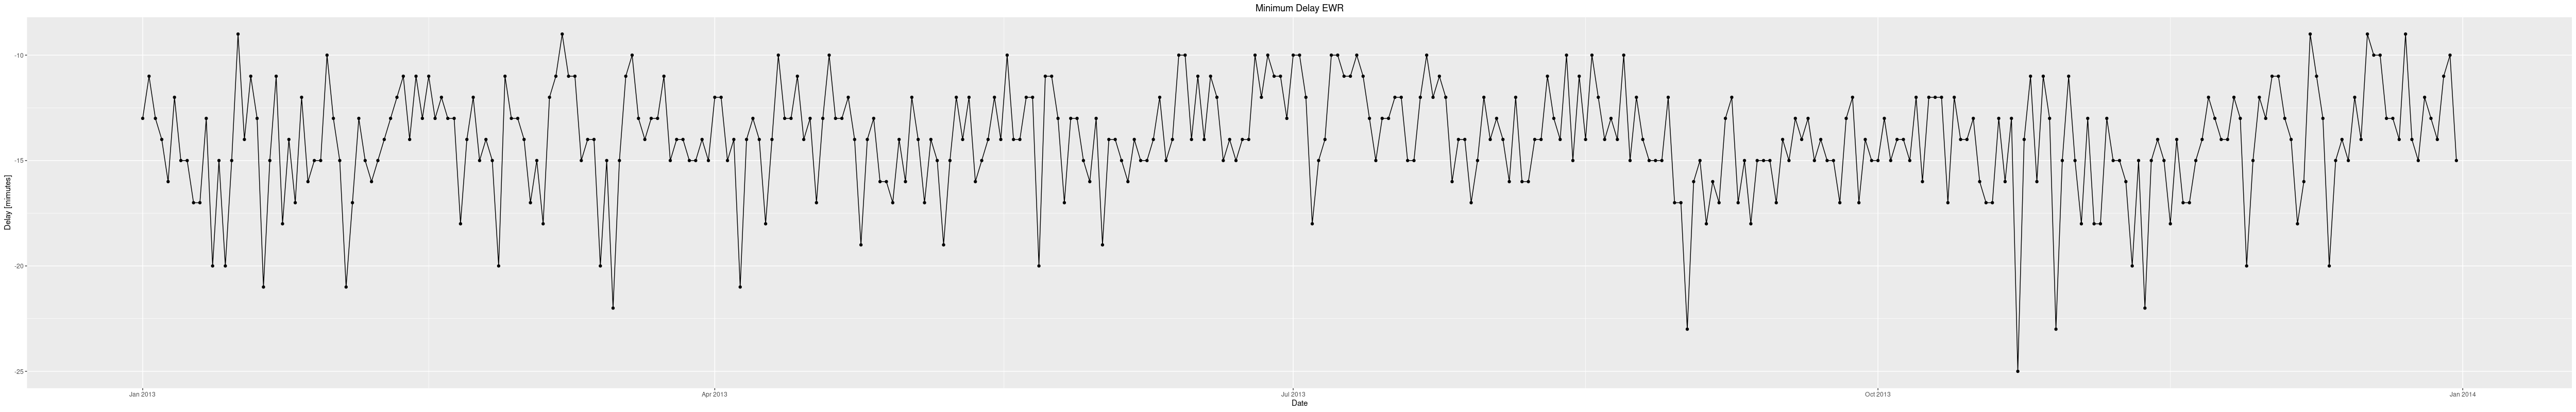

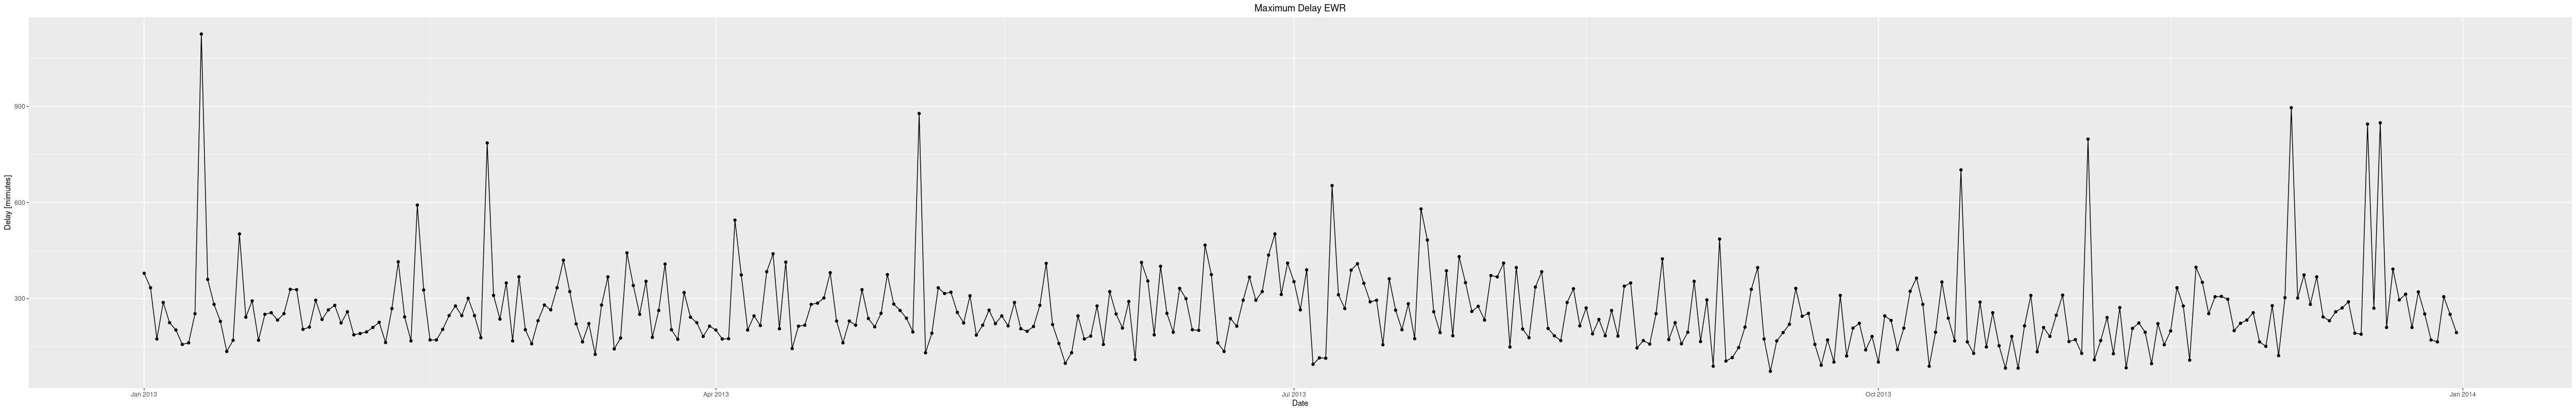

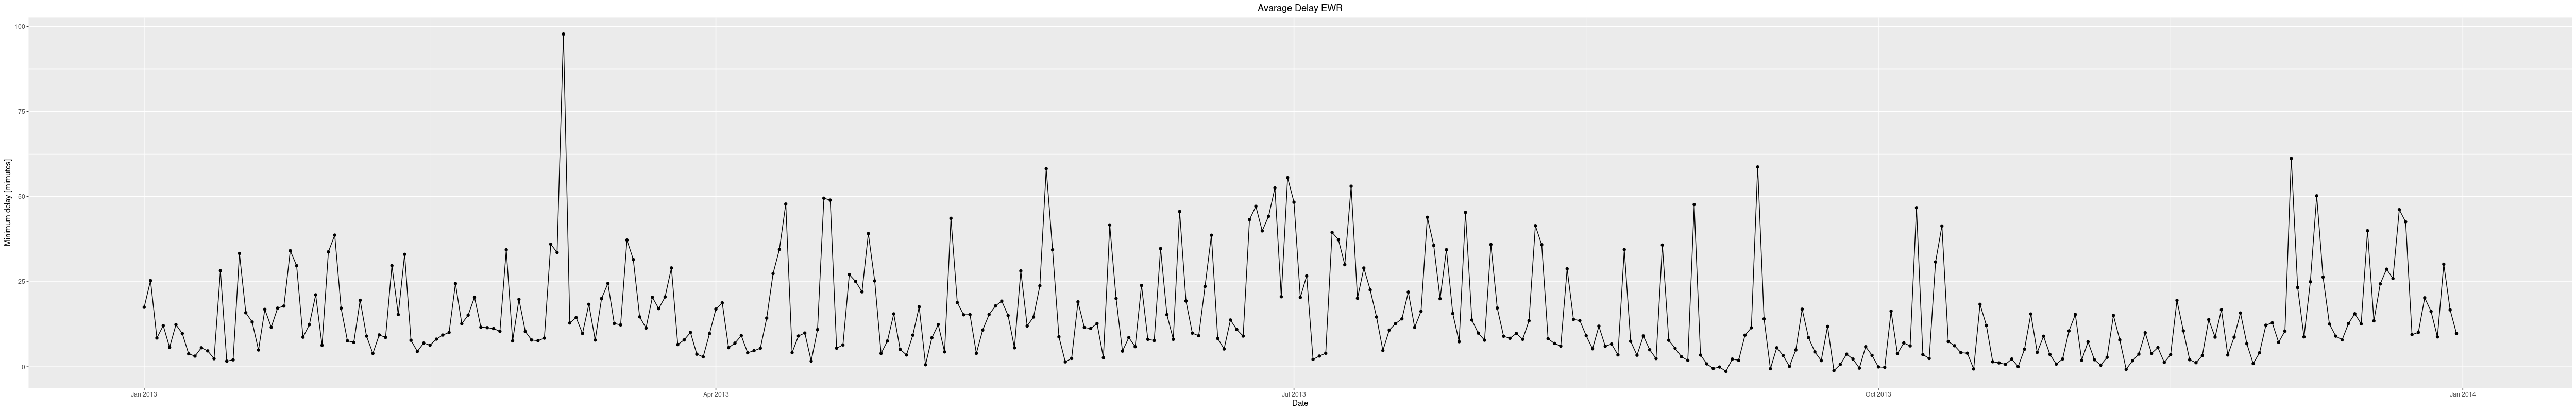

In [54]:
for (i in c('JFK', 'EWR', 'LGA')){
    if (i=='EWR'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(min_delay = min(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=min_delay))+
            geom_line(aes(x=date, y=min_delay)) + 
            ggtitle("Minimum Delay EWR")+
            theme(plot.title = element_text(hjust = 0.5)) +                 
            labs(x='Date', y='Delay [mimutes]') -> min_delay_EWR

        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(max_delay = max(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=max_delay))+
            geom_line(aes(x=date, y=max_delay)) + 
            ggtitle("Maximum Delay EWR")+
            theme(plot.title = element_text(hjust = 0.5)) +                  
            labs(x='Date', y='Delay [mimutes]') -> max_delay_EWR
            
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(mean_delay = mean(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=mean_delay))+
            geom_line(aes(x=date, y=mean_delay)) + 
            ggtitle("Avarage Delay EWR")+
            theme(plot.title = element_text(hjust = 0.5)) +                  
            labs(x='Date', y='Minimum delay [mimutes]') -> avg_delay_EWR
    
    }
}
min_delay_EWR
max_delay_EWR
avg_delay_EWR

options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 100) 


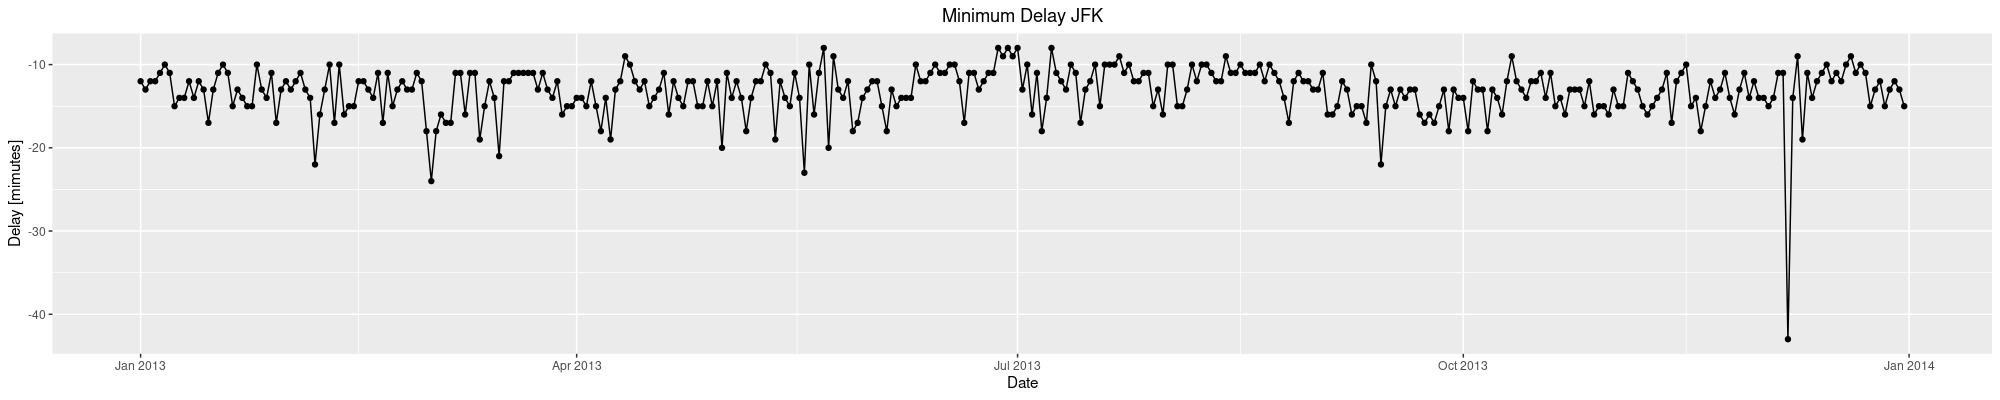

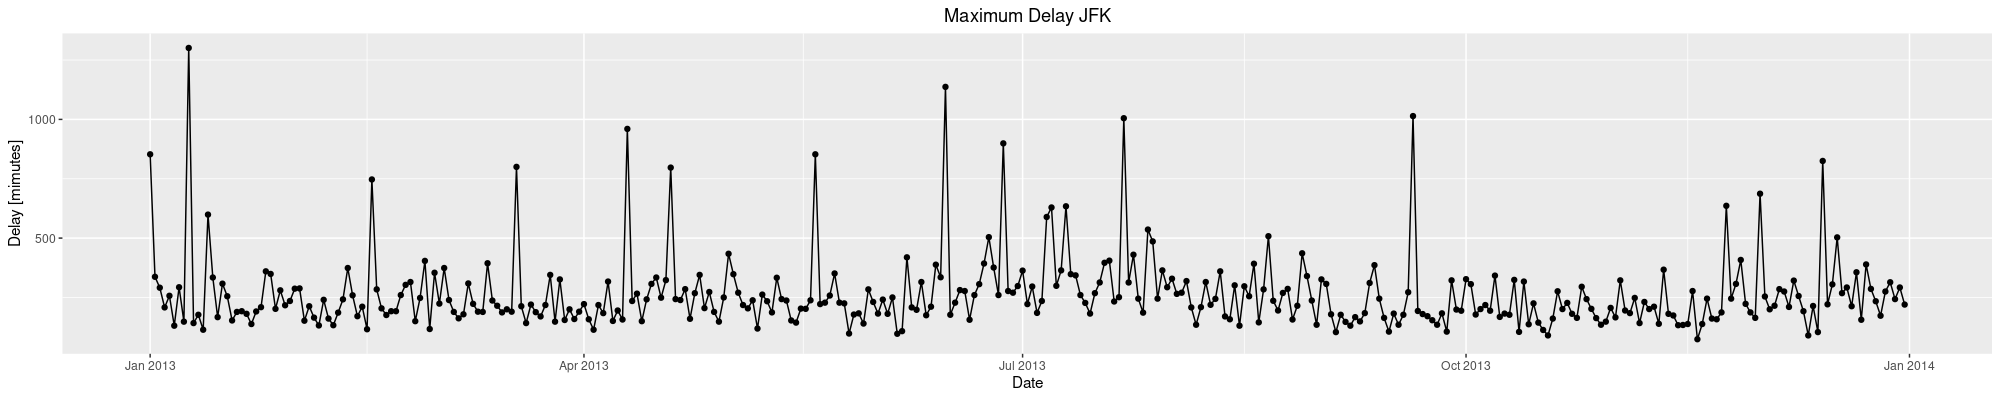

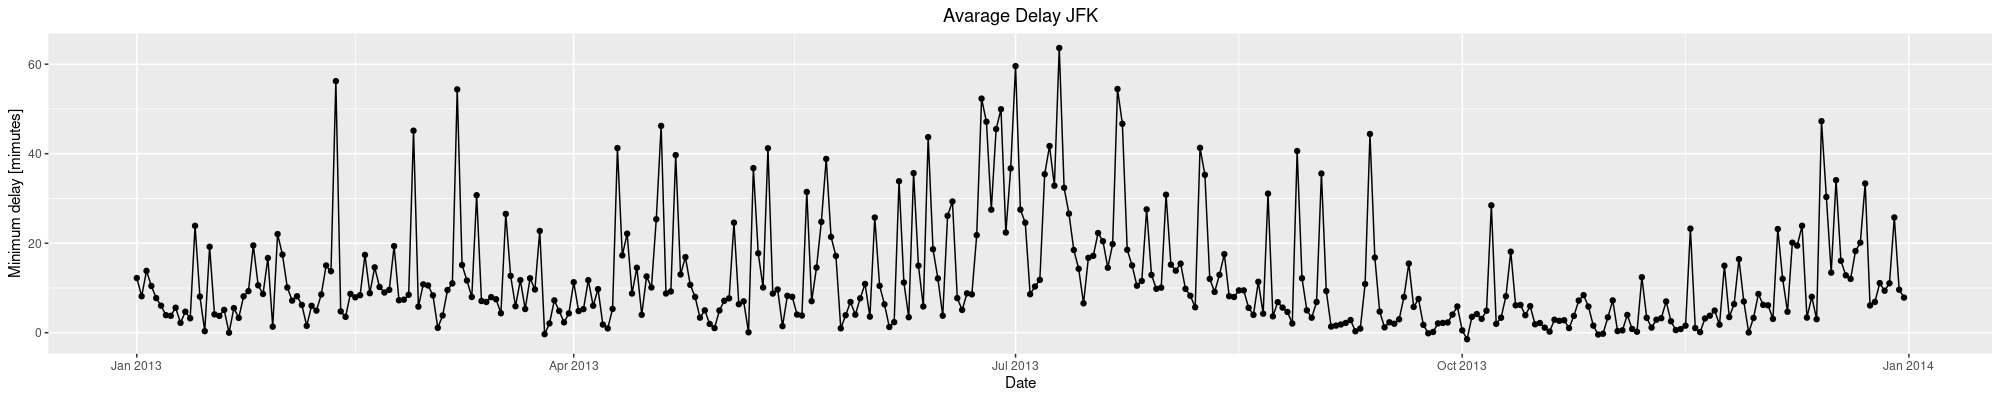

In [55]:
for (i in c('JFK', 'EWR', 'LGA')){
    if (i=='JFK'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(min_delay = min(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=min_delay))+
            geom_line(aes(x=date, y=min_delay,)) +  
            ggtitle("Minimum Delay JFK")+
            theme(plot.title = element_text(hjust = 0.5))  +  
            labs(x='Date', y='Delay [mimutes]') -> min_delay_JFK

        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(max_delay = max(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=max_delay))+
            geom_line(aes(x=date, y=max_delay)) +    
            ggtitle("Maximum Delay JFK")+
            theme(plot.title = element_text(hjust = 0.5))  +              
            labs(x='Date', y='Delay [mimutes]') -> max_delay_JFK
            
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(mean_delay = mean(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=mean_delay))+
            geom_line(aes(x=date, y=mean_delay)) +
            ggtitle("Avarage Delay JFK")+
            theme(plot.title = element_text(hjust = 0.5))+                    
            labs(x='Date', y='Minimum delay [mimutes]') -> avg_delay_JFK
    
    }
}
min_delay_JFK
max_delay_JFK
avg_delay_JFK

options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 100) 

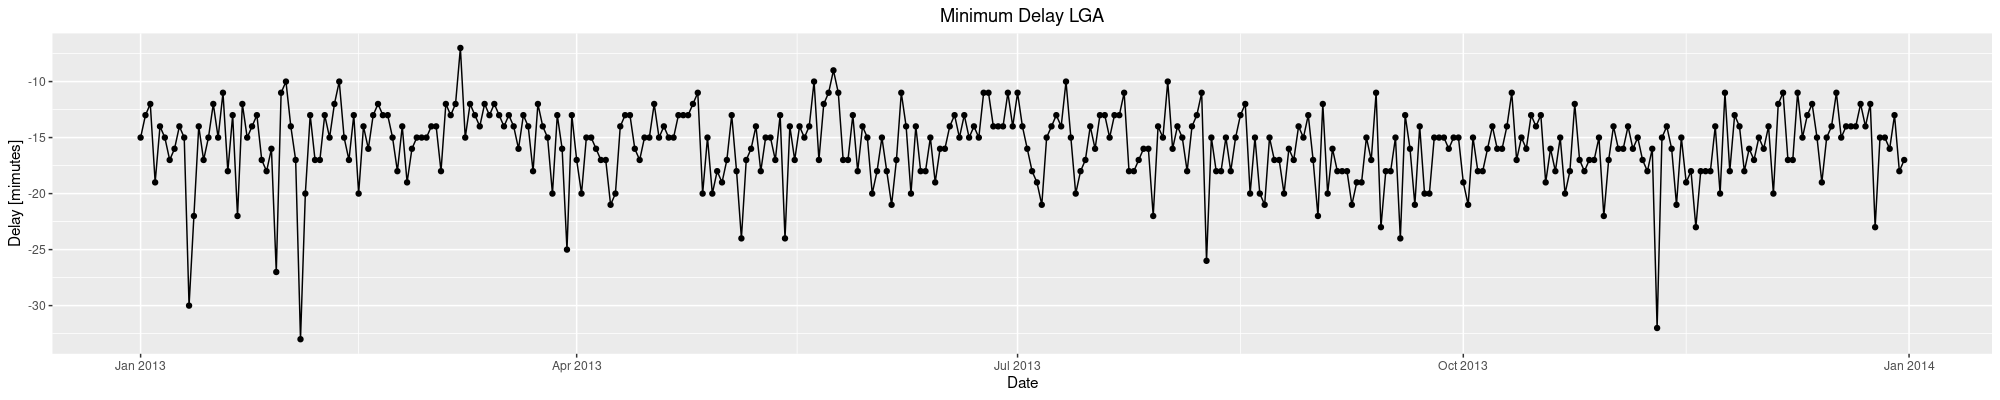

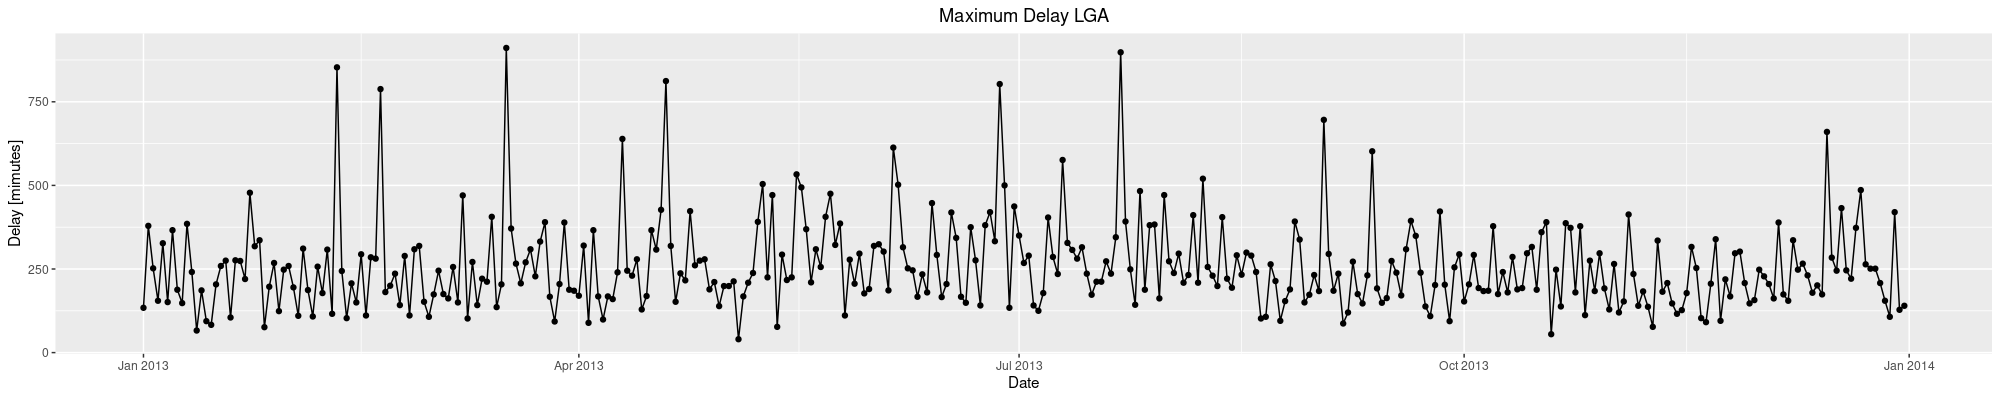

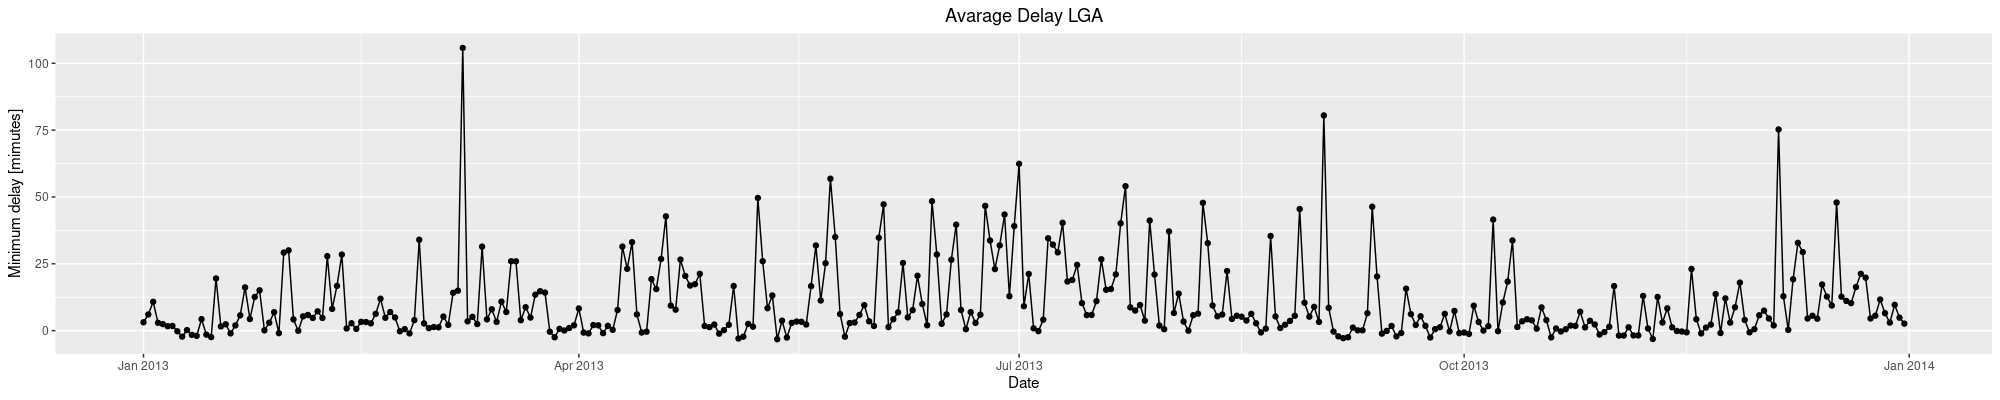

In [56]:
for (i in c('JFK', 'EWR', 'LGA')){
    if (i=='LGA'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(min_delay = min(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=min_delay))+
            geom_line(aes(x=date, y=min_delay)) +  
            ggtitle("Minimum Delay LGA")+
            theme(plot.title = element_text(hjust = 0.5))+                  
            labs(x='Date', y='Delay [mimutes]') -> min_delay_LGA

        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(max_delay = max(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=max_delay))+
            geom_line(aes(x=date, y=max_delay)) +  
            ggtitle("Maximum Delay LGA")+
            theme(plot.title = element_text(hjust = 0.5))+                  
            labs(x='Date', y='Delay [mimutes]') -> max_delay_LGA
            
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(mean_delay = mean(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=mean_delay))+
            geom_line(aes(x=date, y=mean_delay))+ 
            ggtitle("Avarage Delay LGA")+
            theme(plot.title = element_text(hjust = 0.5))  +                 
            labs(x='Date', y='Minimum delay [mimutes]') -> avg_delay_LGA
    
    }
}

min_delay_LGA
max_delay_LGA
avg_delay_LGA
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 100) 


##### 2.4 

In [67]:
# one way to plot is in the following but the output plot is not very pretty so decided to plot it with second method in the next cell

#flights$avg_speed <- c((flights$distance)*1609.34/(((flights$hour)*3600)+ (flights$minute)*60))   # convert the speed to m/s
#flight_avg <- melt(flights[,c(2,3,21)], id=c("month", "day"))
#ggplot(data= flight_avg,aes(x=day, y= value, group=variable, fill=variable)) +geom_line()+facet_grid(. ~ month)
#options(repr.plot.width = 50, repr.plot.height = 8, repr.plot.res = 100) 


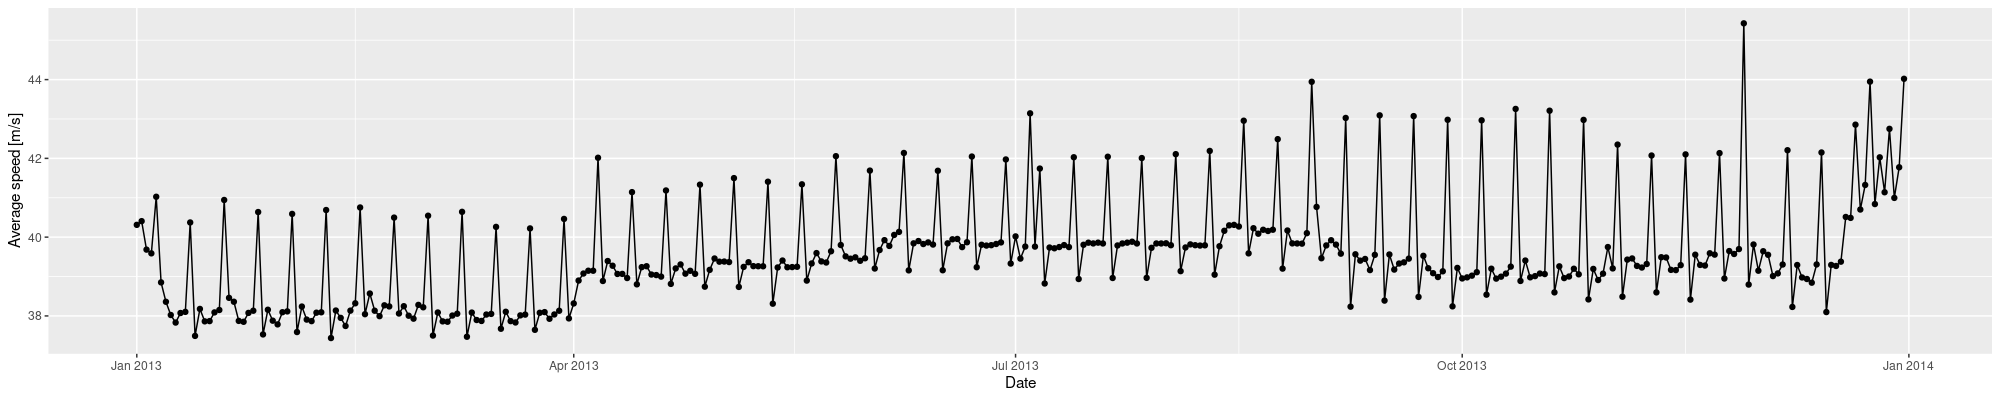

In [57]:
avg<- flights %>% group_by(date) %>% summarise(avarage_speed=mean((distance)*1609.34/(((hour)*3600)+ (minute)*60)))
ggplot(data=avg, aes(x=date ,y=avarage_speed))+ geom_point()+geom_line() +
labs(x='Date', y='Average speed [m/s]')

##### 2.5- analyze the flights offered by each airline company and determine:
##### - the airline companies offering the largest two numbers of flights per day and per week;

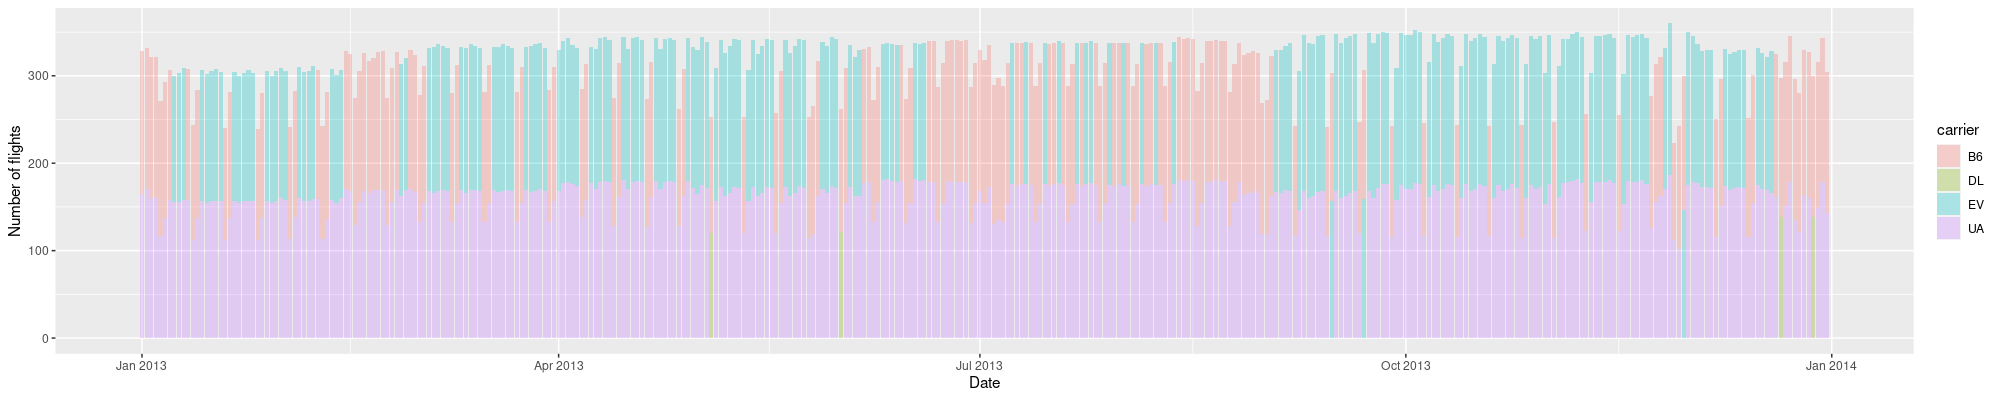

In [58]:
flights |>
    group_by(date) |>
    count(carrier, date) |>
    slice_max(n, n=2, with_ties = FALSE) |> 
    ggplot(aes(x=date, fill=carrier, y=n))+
    geom_bar(position = "stack",stat="identity", alpha=.3) +
    labs(x='Date',y='Number of flights')

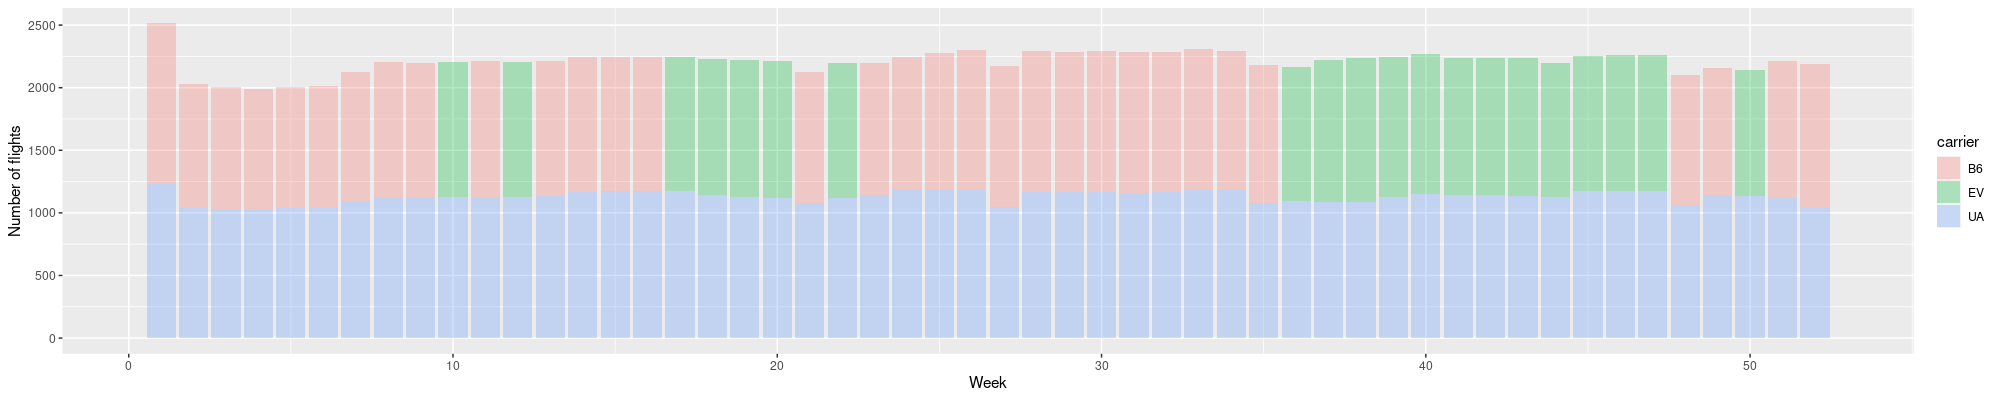

In [59]:
flights$week_number <- isoweek(flights$date)
flights |>
    group_by(week_number) |>
    count(carrier, week_number) |>
    slice_max(n, n=2, with_ties = FALSE) |> 
    ggplot(aes(x=week_number, fill=carrier, y=n))+
    geom_bar(position = "stack",stat="identity", alpha=.3) +
    labs(x='Week',y='Number of flights')

##### - the airline company offering the smallest number of flight per month;

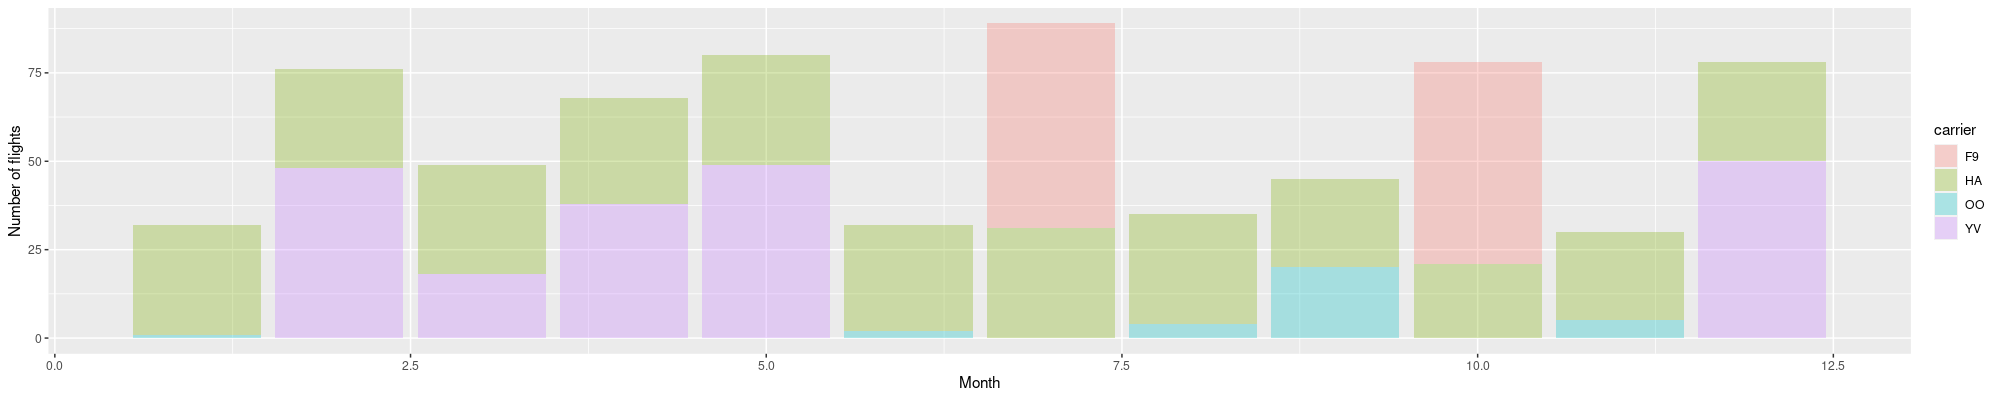

In [60]:

flights |> 
    group_by(month)|>
    count(month, carrier) |>
    slice_min(n, n=2, with_ties = FALSE) |>
    ggplot(aes(x=month, fill=carrier, y=n))+
    geom_bar(position='stack', stat='identity', alpha=.3) +
    labs(x='Month', y='Number of flights')

##### - the airline company offering the longest distance flight per month.

In [61]:
flights |>  right_join(airlines, by='carrier') |> reframe(month, name, distance) |>
        group_by(month) |> arrange(desc(distance)) |> slice(1)

month,name,distance
<int>,<chr>,<dbl>
1,Hawaiian Airlines Inc.,4983
2,Hawaiian Airlines Inc.,4983
3,Hawaiian Airlines Inc.,4983
4,Hawaiian Airlines Inc.,4983
5,Hawaiian Airlines Inc.,4983
6,Hawaiian Airlines Inc.,4983
7,Hawaiian Airlines Inc.,4983
8,Hawaiian Airlines Inc.,4983
9,Hawaiian Airlines Inc.,4983
